# KKBox Churn Prediction

## 1. Data:

### 1.1 Source-

https://www.kaggle.com/c/kkbox-churn-prediction-challenge/overview


### 1.2 Data Information-

The data typically present in the 4 csv files, 


**2.2.1-** start with **train_v2.csv** which contains just two features:

**msno** - user id 

**is_churn** - target variable, where 1 means churn and 0 means renewable



**2.2.2-** second csv is **transaction_v2.csv** which contains 9 features: 

**msno** - user id

**payment_method_id** - represent payment method

**payment_plan_days** - length of membership plan in days

**plan_list_price** - price in New taiwan dollars

**actual_amount_paid** - the actual amount paid for the plan

**is_auto_renew** - whether users plan activated automatically or not

**transaction_date** - the date in which user performed transactions for updating the plan

**membership_expire_date** - the date in which membership expires

**is_cancel** - whether or not the user canceled the membership in this transaction



**1.2.3-** third csv is **user_logs_v2.csv** which contains 9 features:

**msno** - user id

**date_format** - date

**num_25** - numbers of songs played less than 25% of the song length

**num_50** - numbers of songs played between 25% to 50% of the song length

**num_75** - numbers of songs played between 50% to 75% of of the song length

**num_985** - numbers of songs played between 75% to 98.5% of the song length

**num_100** - numbers of songs played over 98.5% of the song length

**num_unq** -  numbers of unique songs played

**total_secs** - total seconds played



**1.2.4-** fourth csv is **members_v3.csv** which contains 6 features:

**msno** - user id

**city** - city code

**bd** - age(outlier prone)

**gender** - male or female

**registered_via** - registration method

**registration_init_time** - registration date


## EDA:
 Importing important libraries-

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reading csv
train_data = pd.read_csv(r"C:\Users\Tim\Downloads\PA-Project\train.csv")
# getting the head (top 5 rows) of df
train_data.head()

msno  is_churn
0  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1
1  f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=         1
2  zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=         1
3  8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=         1
4  K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=         1

In [3]:
# shape of the dataframe
train_data.shape

(970960, 2)

**The train dataset has 970960 rows and just 2 features(columns).**

In [4]:
# number of class labels
train_data['is_churn'].unique()

array([1, 0])

**There are only two class labels avilable, 0 for non-churn and 1 for churn. So ultimately binary classification.**

In [5]:
# checking for any null(nan) value in the dataframe
train_data.isnull().values.any()

False

**The train dataset has no null values.**

In [6]:
# checking for duplicate value in the dataframe
train_data.duplicated().any()

False

**There are no duplicate values.**

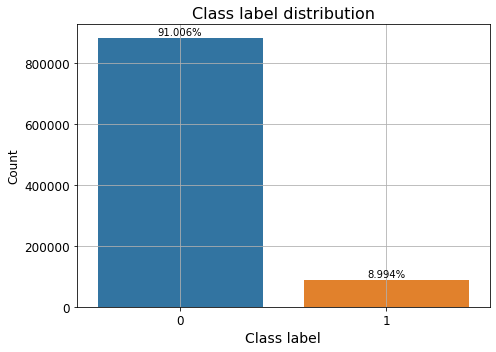

Number of data points in class 1 : 87330 ( 8.994 %)
Number of data points in class 0 : 883630 ( 91.006 %)


In [7]:

plt.figure(figsize=(7, 5))
ax = sns.countplot(data=train_data, x='is_churn')
plt.xticks(size=12)
plt.xlabel('Class label', size=14)
plt.yticks(size=12)
plt.ylabel('Count', size=12)
plt.title('Class label distribution', size=16)

total = len(train_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.3f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.grid()
plt.show()

class_distribution = train_data['is_churn'].value_counts().sort_index()
sorted_yi = np.argsort(class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i , ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/train_data.shape[0]*100), 3), '%)')

**By looking at this analysis, there is a clear picture that the dataset is highly imbalanced. Because there are a lot of non-churned users as compare to churned users.**

## EDA 1

### 3.3 Analysis on members data-

In [8]:
# reading csv
members_data = pd.read_csv('"C:\Users\Tim\Downloads\PA-Project\member.csv"')
# getting the head (top 5 rows) of df
members_data.head()

msno  city  bd  gender  \
0  Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=     1   0     NaN   
1  +tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=     1   0     NaN   
2  cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=     1   0     NaN   
3  9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=     1   0     NaN   
4  WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=     6  32  female   

   registered_via  registration_init_time  
0              11                20110911  
1               7                20110914  
2              11                20110915  
3              11                20110915  
4               9                20110915

In [9]:
# shape of the members dataframe
members_data.shape

(6769473, 6)

**The members dataset has 6769473 rows and 6 features(columns).**

In [10]:
# merging train dataset with members dataset
train_members = pd.merge(train_data, members_data, on='msno', how='left')
# getting the head (top 5 rows) of df
train_members.head()

msno  is_churn  city    bd  gender  \
0  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0    male   
1  f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=         1  13.0  20.0    male   
2  zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=         1  13.0  18.0    male   
3  8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=         1   1.0   0.0     NaN   
4  K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=         1  13.0  35.0  female   

   registered_via  registration_init_time  
0             3.0              20131223.0  
1             3.0              20131223.0  
2             3.0              20131227.0  
3             7.0              20140109.0  
4             7.0              20140125.0

In [11]:
# shape of the members dataframe
train_members.shape

(970960, 7)

**The train member dataset has 970960 rows and 7 features(6 columns and a class label).**

In [12]:
# getting basic information about the dataframe
train_members.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    970960 non-null  object 
 1   is_churn                970960 non-null  int64  
 2   city                    860967 non-null  float64
 3   bd                      860967 non-null  float64
 4   gender                  388905 non-null  object 
 5   registered_via          860967 non-null  float64
 6   registration_init_time  860967 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 59.3+ MB


**Observations: -**
1. Rest of the features except msno, are the numerical features.
2. This dataset contain lot of missing values.

In [13]:
# getting features wise null values (number)
train_members.isnull().sum()

msno                           0
is_churn                       0
city                      109993
bd                        109993
gender                    582055
registered_via            109993
registration_init_time    109993
dtype: int64

**It's better to impute some suitable values instead of nan values. Because here there are a lot of missing values.**

## Univariate Analysis

In [14]:
# to plot count plot with percentage
def count_plot(data, col1, xname, yname, title, fig, col2='is_churn'):
    '''This function is used to plot a count plot, with percentage displayed on top of each bin'''
    
    # https://stackoverflow.com/questions/63603222/adding-percentages-to-sns-countplot-how-do-i-show-percentages-for-two-values-w
    plt.figure(figsize=fig)
    ax = sns.countplot(data=data, x=col1, hue=col2, hue_order=[0, 1])
    plt.xticks(size=12)
    plt.xlabel(xname, size=14)
    plt.yticks(size=12)
    plt.ylabel(yname, size=12)
    plt.title(title, size=16)
    
    total = len(data)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', size=12)
    plt.tight_layout()
    plt.grid()
    plt.show()

In [15]:
# to get category wise percentage and total churn
def countplot_analysis(data, col1, xname, yname, title, fig, col2='is_churn', top=False):
    '''This function is used to display a table with the total and average churned users'''
    
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    temp['total_users'] = pd.DataFrame(data.groupby(col1)[col2].agg(total_users='count')).reset_index()['total_users']
    temp['average_churned_users'] = pd.DataFrame(data.groupby(col1)[col2].agg(average_churned_users='mean')).reset_index()['average_churned_users']
    
    temp.sort_values(by=['total_users'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    count_plot(data, col1, xname, yname, title, fig, col2)
    print(temp)

In [16]:
# countplot without percentage
def countplot1_analysis(data, col1, xname, yname, title, fig, col2='is_churn', top=False):
    '''This function is used to plot count plot and then total and average of the churned users'''
    
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    temp['total_users'] = pd.DataFrame(data.groupby(col1)[col2].agg(total_users='count')).reset_index()['total_users']
    temp['average_churned_users'] = pd.DataFrame(data.groupby(col1)[col2].agg(average_churned_users='mean')).reset_index()['average_churned_users']
    
    temp.sort_values(by=['total_users'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    plt.figure(figsize=fig)
    sns.countplot(x=col1, data=data, hue=col2)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.grid()
    plt.show()
    print(temp)

In [17]:
# to get boxplot
def boxplot(data, col2, xname, yname, title, col1='is_churn'):
    '''This function is used to plot the boxplot'''
    
    sns.boxplot(x=col1, y=col2, data=data)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title(title)
    plt.show()

### 3.3.1 Members dataset (city)-

In [18]:
# number of unique city codes
print(train_members['city'].unique())
print(len(train_members['city'].unique()))

[ 5. 13.  1. 22.  9. 12.  6. 14.  4. nan 15. 18.  3. 21.  8.  7. 17. 11.
 10. 20. 16. 19.]
22


**There are 22 unique city codes, including nan.**

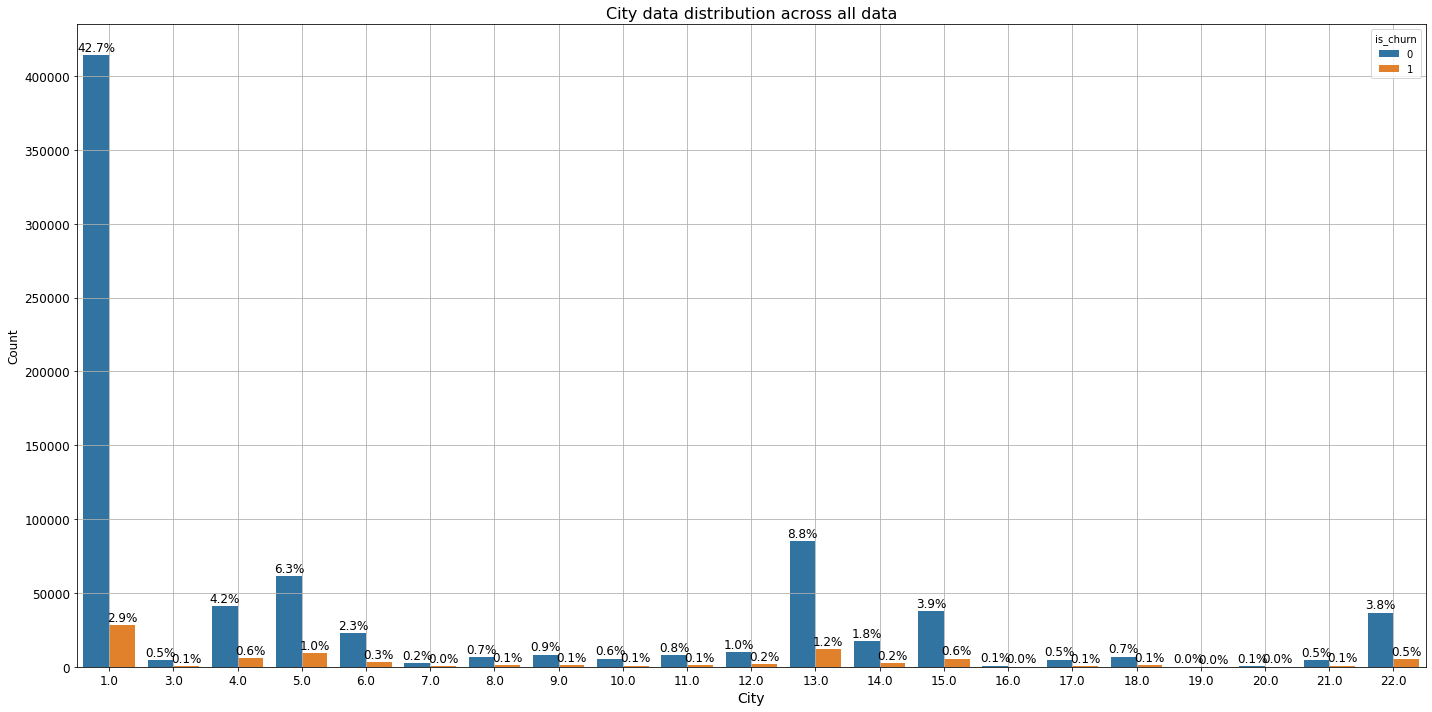

    city  is_churn  total_users  average_churned_users
0    1.0     28351       442598               0.064056
11  13.0     11950        97136               0.123023
3    5.0      9333        70706               0.131997
2    4.0      6094        47227               0.129036
13  15.0      5538        43187               0.128233
20  22.0      5284        41991               0.125836
4    6.0      3358        26066               0.128827
12  14.0      2370        20013               0.118423
10  12.0      1585        11383               0.139243
7    9.0      1200         9526               0.125971
9   11.0      1096         9138               0.119939
16  18.0       913         7792               0.117171
6    8.0      1021         7589               0.134537
8   10.0       858         6470               0.132612
15  17.0       571         5476               0.104273
19  21.0       765         5199               0.147144
1    3.0       672         5057               0.132885
5    7.0  

In [19]:
countplot_analysis(train_members, 'city', 'City', 'Count', 'City data distribution across all data', (20, 10),'is_churn', False)

**Observations: -**
 
1. There are a lot of users(almost 45%) from the city with the code 1, but in terms of average churned users for this city is less, as compare to other cities.
2. City code 21 contain the highest churning rate as compare to other cities, which is 14.71%
3. Average churning rate lie in between 10% to 14.7% except for the city 1, which is having average churning rate of 6.4%

**It's always good to fill some suitable values in place of nan. Since there is no city code with the value '0', so I can fill those nan values with 0 at data preprocessing.**

###  Members dataset (bd)-

In [20]:
# number of unique bd's
x = train_members['bd'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['28.000000', '20.000000', '18.000000', '0.000000', '35.000000', '21.000000', '32.000000', '29.000000', '38.000000', '49.000000', '24.000000', '17.000000', 'nan', '31.000000', '22.000000', '30.000000', '23.000000', '19.000000', '36.000000', '26.000000', '40.000000', '34.000000', '41.000000', '25.000000', '27.000000', '44.000000', '33.000000', '37.000000', '16.000000', '43.000000', '42.000000', '48.000000', '39.000000', '54.000000', '55.000000', '46.000000', '52.000000', '15.000000', '14.000000', '61.000000', '51.000000', '47.000000', '53.000000', '60.000000', '67.000000', '45.000000', '63.000000', '105.000000', '57.000000', '50.000000', '117.000000', '59.000000', '64.000000', '72.000000', '58.000000', '70.000000', '321.000000', '106.000000', '12.000000', '62.000000', '74.000000', '97.000000', '65.000000', '110.000000', '2.000000', '112.000000', '66.000000', '80.000000', '5.000000', '91.000000', '13.000000', '71.000000', '102.000000', '56.000000', '10.000000', '1037.000000', '68.000000'

**Observations: -**
    
1. There are 232 different bd(age) values.
2. As we knows it's age, and by looking at the values there are lot of outliers.

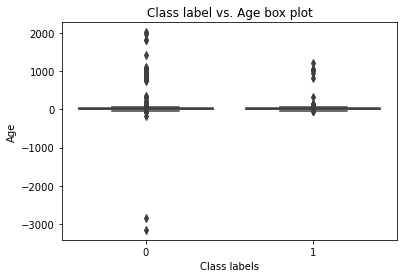

In [21]:
# boxplot
boxplot(train_members, 'bd', 'Class labels', 'Age', 'Class label vs. Age box plot', col1='is_churn')

**There are a lot of outliers, as already mentioned by KKBox. So it's better to remove outliers first and then analyze this feature.**

**In order to get the idea of age range, I can use percentile approach.**

In [22]:
# getting 0th to 100th percentiles of bd feature
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_members['bd'], i))
print('*' * 50)
print('*' * 50)
# getting 99.1th to 100th percentile to obtain max reasonable age
for i in range(1, 11, 1):
    print(99+(i/10), 'th percentile value is: ', np.nanpercentile(train_members['bd'], 99+(i/10)))

0 th percentile value is:  -3152.0
10 th percentile value is:  0.0
20 th percentile value is:  0.0
30 th percentile value is:  0.0
40 th percentile value is:  0.0
50 th percentile value is:  0.0
60 th percentile value is:  21.0
70 th percentile value is:  25.0
80 th percentile value is:  29.0
90 th percentile value is:  35.0
100 th percentile value is:  2016.0
**************************************************
**************************************************
99.1 th percentile value is:  54.0
99.2 th percentile value is:  54.0
99.3 th percentile value is:  55.0
99.4 th percentile value is:  56.0
99.5 th percentile value is:  57.0
99.6 th percentile value is:  59.0
99.7 th percentile value is:  61.0
99.8 th percentile value is:  64.0
99.9 th percentile value is:  72.0
100.0 th percentile value is:  2016.0


**So the minimum age is 0(although non sensable) and the maximum reasonable age in 72. So I can keep only the age in between 0 and 72, and for rest of the ages I can set them as nan.**

In [23]:
train_members['bd'] = train_members['bd'].apply(lambda x: x if (x < 72.0) and (x > 0.0) else np.nan)

In [24]:
bins = np.arange(1, 10) * 10
train_members['category'] = np.digitize(train_members['bd'], bins, right=True)

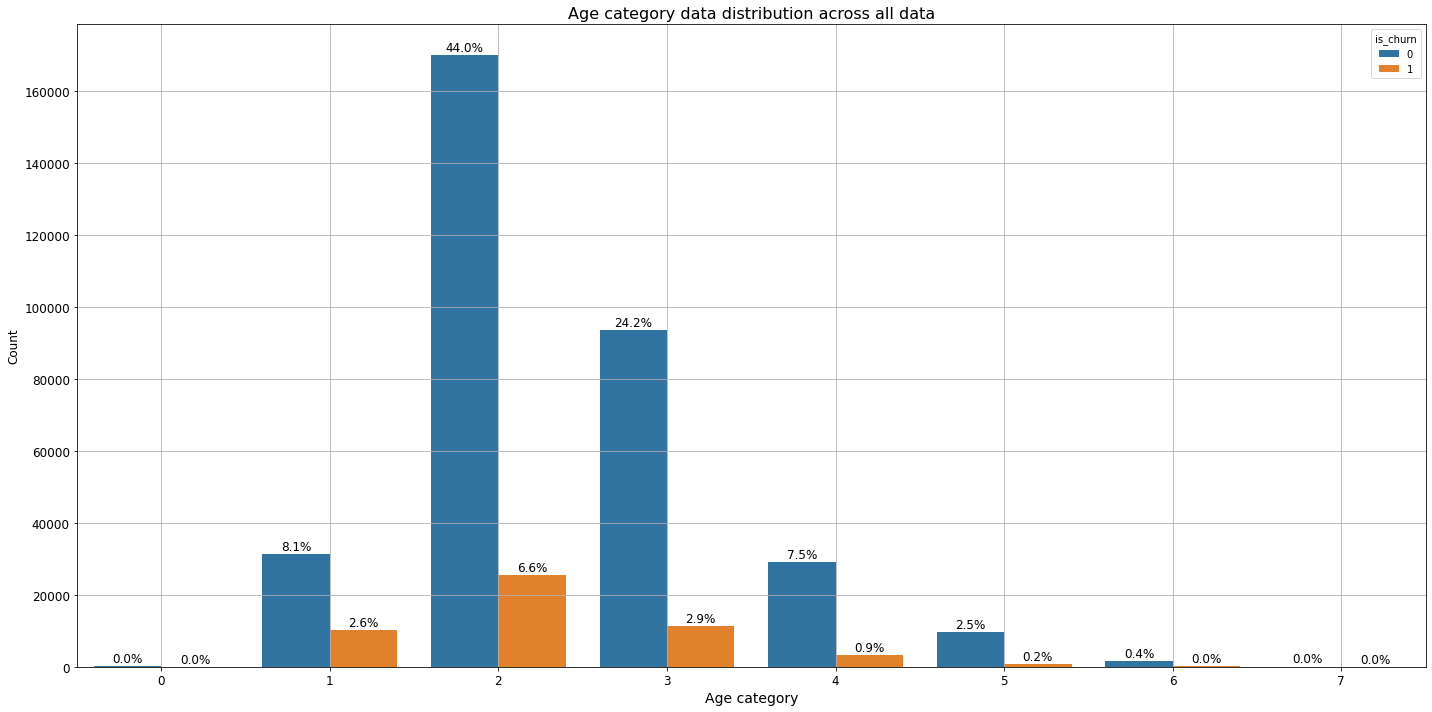

   category  is_churn  total_users  average_churned_users
2         2     25483       195420               0.130401
3         3     11280       104707               0.107729
1         1     10159        41428               0.245221
4         4      3291        32315               0.101841
5         5       857        10429               0.082175
6         6       189         1822               0.103732
0         0        15          114               0.131579
7         7         6           40               0.150000


In [25]:
# count plot
countplot_analysis(train_members[train_members['category'] != 9], 'category', 'Age category', 'Count', 'Age category data distribution across all data', (20, 10),'is_churn', False)

**There are lot of youth and adults(typically from category 1 to 4), and in terms of user churn the youth and adults are highly lookable, because for every category there is more than 10% churning rate.**

**It's better to impute nan values with the median age.**

In [26]:
# getting median age
np.nanmedian(train_members['bd'])

28.0

#Members dataset (gender)-

In [27]:
# number of unique genders
print(train_members['gender'].unique())
print(len(train_members['gender'].unique()))

['male' nan 'female']
3


**There are 3 unique values for gender feature including nan.**

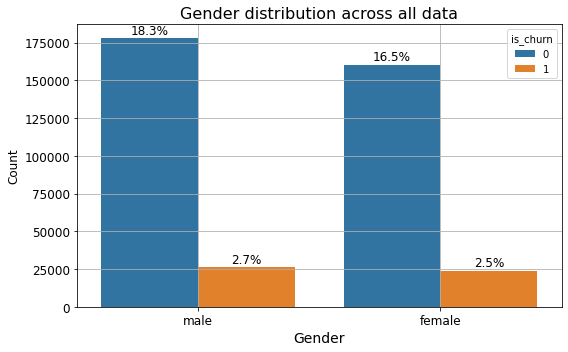

   gender  is_churn  total_users  average_churned_users
1    male     26396       204561               0.129037
0  female     23940       184344               0.129866


In [28]:
# count plot
countplot_analysis(train_members, 'gender', 'Gender', 'Count', 'Gender distribution across all data', (8,5),'is_churn', False)

**It's good to impute some suitable value instead of nan.**

So what I can do here is, setting male to code '1', setting female to code '2', and setting nan to code '0' at data preprocessing.

### 3.3.4 Members dataset (registered_via)-

In [29]:
# number of unique registration ways
print(train_members['registered_via'].unique())
print(len(train_members['registered_via'].unique()))

[ 3.  7.  9. nan  4. 13.]
6


**So there are 6 unique registration ways to the service, including nan.**

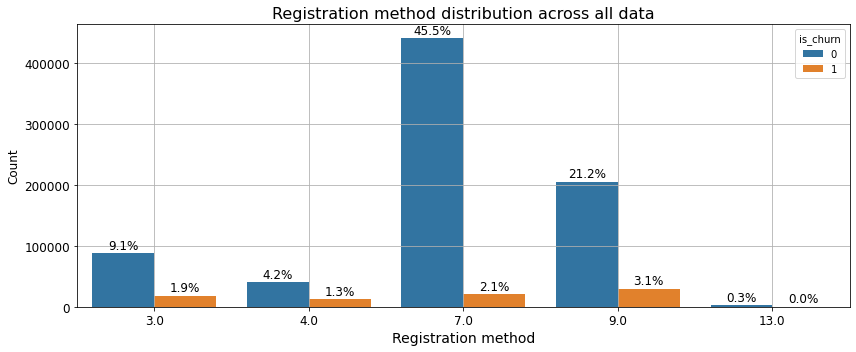

   registered_via  is_churn  total_users  average_churned_users
2             7.0     20697       462684               0.044732
3             9.0     29893       235689               0.126832
0             3.0     18338       106459               0.172254
1             4.0     12185        52744               0.231022
4            13.0       335         3391               0.098791


In [30]:
# count plot
countplot_analysis(train_members, 'registered_via', 'Registration method', 'Count', 'Registration method distribution across all data', (12,5),'is_churn', False)

**Observations: -**
    
1. Almost 48% users uses registration method 7 to enter to the service.
2. The users who entered via registration method 7 has less tendency or churning(althought it is lookable).
3. The users who registered via registration method 4 has major tendency or churning, which is 23% for given data.
4. There are very few peoples who uses registration method 13 to enter to the service.

**Since there is no registration category with the value 0, hence I can impute 0 in place of nan at the data preprocessing.**

###  Members dataset (registration_init_time)-

In [31]:
# converting float date to datetime
train_members['registration_init_time'] = pd.to_datetime(train_members['registration_init_time'], format='%Y%m%d')
# getting head of the feature
train_members['registration_init_time'].head()

0   2013-12-23
1   2013-12-23
2   2013-12-27
3   2014-01-09
4   2014-01-25
Name: registration_init_time, dtype: datetime64[ns]

In [32]:
# adding year feature
train_members['year'] = train_members['registration_init_time'].dt.year.values
# adding month feature
train_members['month'] = train_members['registration_init_time'].dt.month.values

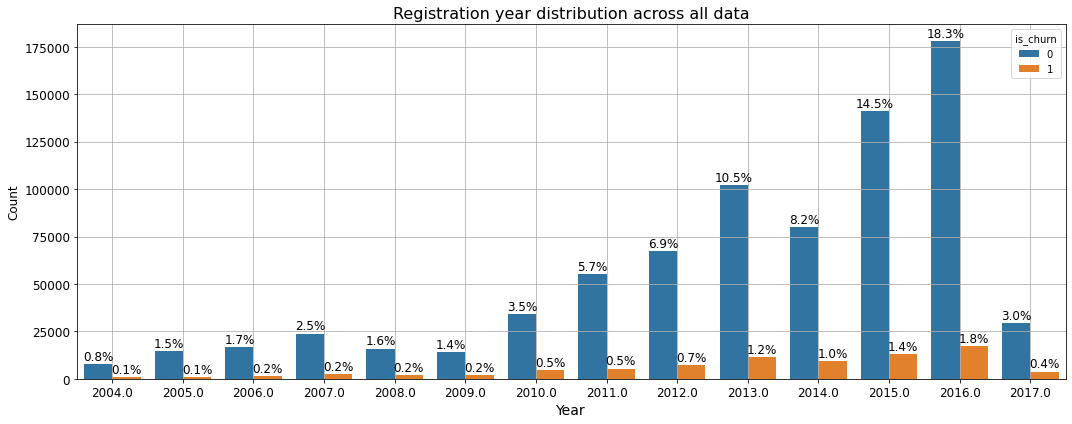

      year  is_churn  total_users  average_churned_users
12  2016.0     17270       195184               0.088481
11  2015.0     13217       154376               0.085616
9   2013.0     11529       113444               0.101627
10  2014.0      9452        89332               0.105808
8   2012.0      7168        74495               0.096221
7   2011.0      5332        60698               0.087845
6   2010.0      4497        38640               0.116382
13  2017.0      3833        33230               0.115348
3   2007.0      2366        26158               0.090450
2   2006.0      1469        18048               0.081394
4   2008.0      1776        17685               0.100424
5   2009.0      1744        15731               0.110864
1   2005.0      1063        15616               0.068071
0   2004.0       732         8330               0.087875


In [33]:
# count plot
countplot_analysis(train_members, 'year', 'Year', 'Count', 'Registration year distribution across all data', (15,6),'is_churn', False)

**There is reasonable number of churned users each year, which is starting from 6% to almost 12%. And the churn rate based on year, doen't not follow increasing pattern usually.** 

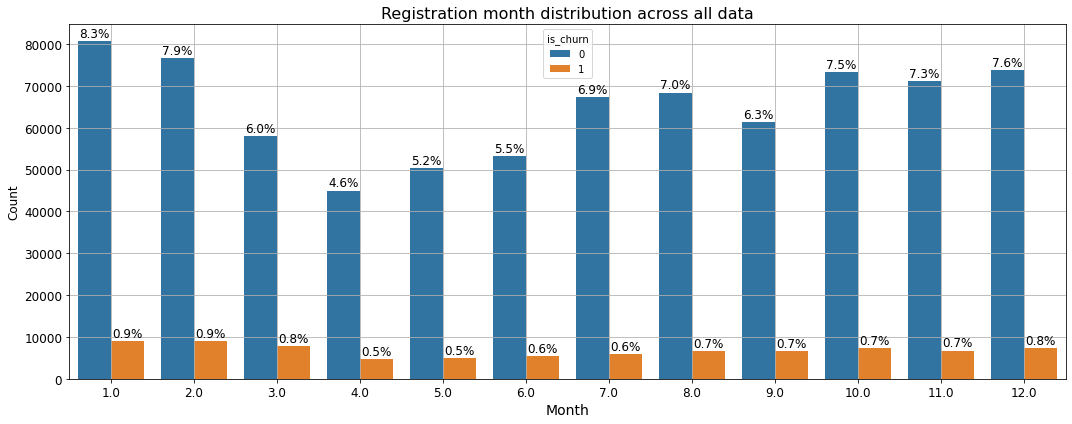

    month  is_churn  total_users  average_churned_users
0     1.0      8949        89640               0.099833
1     2.0      9035        85628               0.105515
11   12.0      7345        81230               0.090422
9    10.0      7260        80528               0.090155
10   11.0      6755        77988               0.086616
7     8.0      6631        75068               0.088333
6     7.0      5843        73204               0.079818
8     9.0      6602        67985               0.097110
2     3.0      7911        65938               0.119976
5     6.0      5364        58582               0.091564
4     5.0      5025        55444               0.090632
3     4.0      4728        49732               0.095070


In [34]:
# count plot
countplot_analysis(train_members, 'month', 'Month', 'Count', 'Registration month distribution across all data', (15,6),'is_churn', False)

**There is also reasonable churning rate month wise also, which is having range from 7% to almost 12%. On the month of january there are highest number of user registration.**

**Getting median date in order to impute missing values at data preprocessing.**

In [36]:
# getting median date
dates = list(train_members.sort_values('registration_init_time')['registration_init_time'])
print(dates[len(dates)//2])

2015-02-04 00:00:00


## Bi-variate Analysis

**Since there are only 5 features, so best way to perform bi-variate analysis is Pair plot. Here I am removing registration date and gender feature.**

Text(0.5, 1.01, 'Bi-variate analysis across all features')

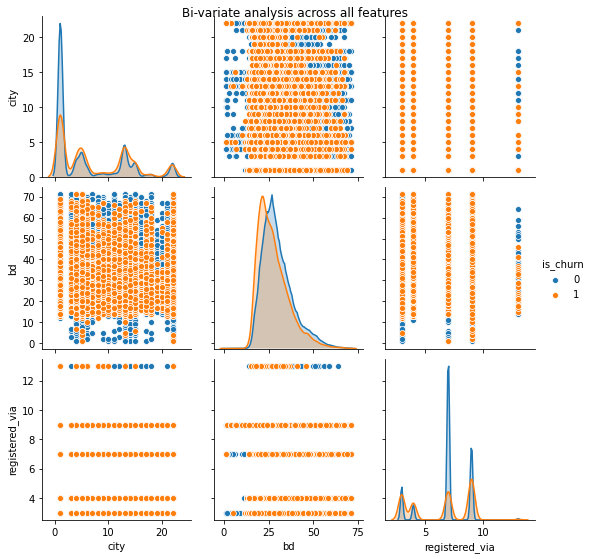

In [38]:
# pair plot
g = sns.pairplot(train_members, vars=['city', 'bd', 'registered_via'], hue='is_churn')
g.fig.suptitle('Bi-variate analysis across all features', y=1.01)

## EDA 2

### 3.4 Analysis on transactions data-

In [39]:
# reading csv
transactions_data = pd.read_csv('"C:\Users\Tim\Downloads\PA-Project\train.csv"')
transactions_data.head()

msno  payment_method_id  \
0  ++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=                 32   
1  ++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=                 41   
2  +/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=                 36   
3  +/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=                 36   
4  +00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=                 41   

   payment_plan_days  plan_list_price  actual_amount_paid  is_auto_renew  \
0                 90              298                 298              0   
1                 30              149                 149              1   
2                 30              180                 180              1   
3                 30              180                 180              1   
4                 30               99                  99              1   

   transaction_date  membership_expire_date  is_cancel  
0          20170131                20170504          0  
1          20150809                20190412          0  
2          20170303                20170422          0  
3          20170329                20170331          1  
4          20170323                20170423          0

In [40]:
# shape of the dataframe
transactions_data.shape

(1431009, 9)

**The members dataset has 1431009 rows and 9 features(columns).**

In [41]:
# merging train dataset with transactions dataset
train_transactions = pd.merge(train_data, transactions_data, on='msno', how='left')
# getting the head (top 5 rows) of df
train_transactions.head()

msno  is_churn  payment_method_id  \
0  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1                NaN   
1  f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=         1               36.0   
2  zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=         1               17.0   
3  zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=         1               15.0   
4  8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=         1               41.0   

   payment_plan_days  plan_list_price  actual_amount_paid  is_auto_renew  \
0                NaN              NaN                 NaN            NaN   
1               30.0            180.0               180.0            0.0   
2               60.0              0.0                 0.0            0.0   
3               90.0            300.0               300.0            0.0   
4               30.0            149.0               149.0            1.0   

   transaction_date  membership_expire_date  is_cancel  
0               NaN                     NaN        NaN  
1        20170311.0              20170411.0        0.0  
2        20170311.0              20170314.0        0.0  
3        20170314.0              20170615.0        0.0  
4        20150908.0              20170608.0        0.0

In [42]:
# shape of the dataframe
train_transactions.shape

(1169418, 10)

**The train member dataset has 1169418 rows and 10 features(9 columns and a class label).**

In [43]:
# getting basic information about the dataframe
train_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169418 entries, 0 to 1169417
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   msno                    1169418 non-null  object 
 1   is_churn                1169418 non-null  int64  
 2   payment_method_id       1132036 non-null  float64
 3   payment_plan_days       1132036 non-null  float64
 4   plan_list_price         1132036 non-null  float64
 5   actual_amount_paid      1132036 non-null  float64
 6   is_auto_renew           1132036 non-null  float64
 7   transaction_date        1132036 non-null  float64
 8   membership_expire_date  1132036 non-null  float64
 9   is_cancel               1132036 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 98.1+ MB


**Observations: -**
    
1. All the features are the float features.
2. There are some null values present in each of the merged features.

In [44]:
# checking for duplicate values
train_transactions.duplicated().any()

False

**There are no duplicate rows/observations.**

In [45]:
# getting features wise null values (number)
train_transactions.isnull().sum()

msno                          0
is_churn                      0
payment_method_id         37382
payment_plan_days         37382
plan_list_price           37382
actual_amount_paid        37382
is_auto_renew             37382
transaction_date          37382
membership_expire_date    37382
is_cancel                 37382
dtype: int64

## Univariate Analysis

### 3.4.1 Transactions dataset (payment_method_id)-

In [46]:
# number of unique payment_method
print(train_transactions['payment_method_id'].unique())
print(len(train_transactions['payment_method_id'].unique()))

[nan 36. 17. 15. 41. 40. 38. 32. 33. 35. 39. 37. 20. 30. 29. 16. 19. 13.
 22. 34. 28. 10. 31. 26. 27. 21. 12. 18. 23. 11.  3. 14.  6.  8.]
34


**So there are 34 unique payment methods available, including nan.**

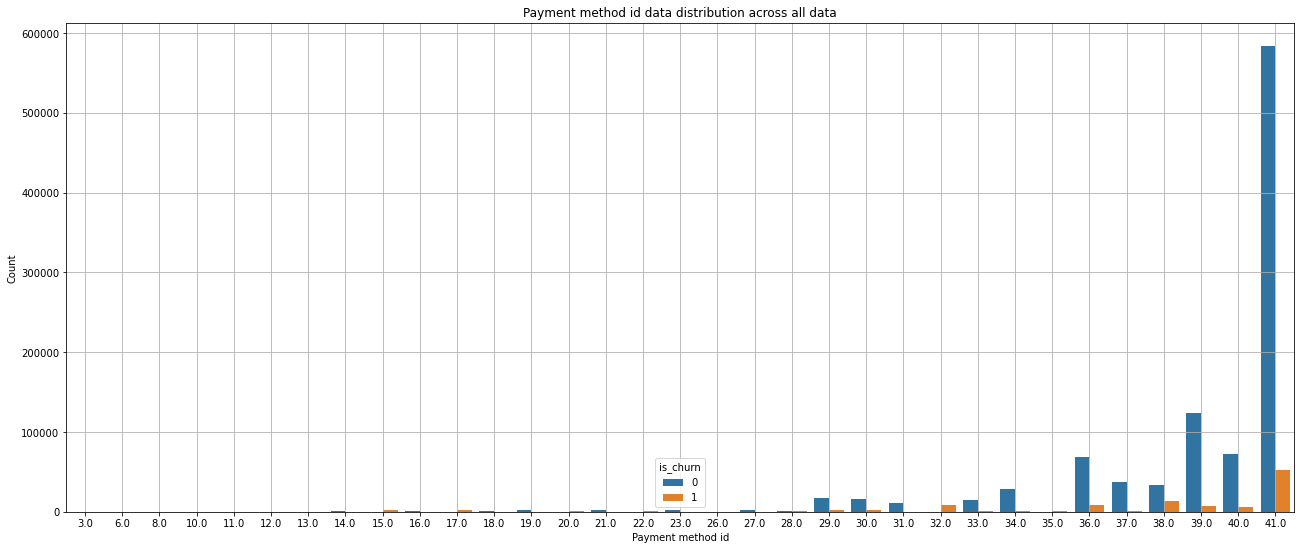

    payment_method_id  is_churn  total_users  average_churned_users
32               41.0     52481       636230               0.082487
30               39.0      7609       131672               0.057788
31               40.0      5908        77817               0.075922
27               36.0      8046        76543               0.105117
29               38.0     13788        47420               0.290763
28               37.0      1421        38224               0.037176
25               34.0      1175        30088               0.039052
20               29.0      2630        19501               0.134865
21               30.0      2526        18017               0.140201
24               33.0       810        15961               0.050749
22               31.0       279        11034               0.025285
23               32.0      8300         8609               0.964107
8                15.0      2701         3001               0.900033
16               23.0       148         2612    

In [47]:
# count plot
countplot1_analysis(train_transactions, 'payment_method_id', 'Payment method id', 'Count', 'Payment method id data distribution across all data', (22, 9),'is_churn', False)

**Observations: -**
    
1. There are a lot of users(almost 54%) who used 41th payment method. And also good number of users uses payment method 36, 39 and 40.
2. There are very bad churning rate for the payment method 3 and 6, hence all users churned.
3. For the payment method 8, 12, 13, 22, 35, 20, 17, 15, 32 there is also high churning rate.
4. It possibly represent that these payment methods are not good.

**Since there are some missing values and also '0' is not a category, so I can impute 0 in place of nan at data preprocessing.**

### 3.4.2 Transactions dataset (payment_plan_days)-

In [48]:
# number of unique payment plan days
print(train_transactions['payment_plan_days'].unique())
print(len(train_transactions['payment_plan_days'].unique()))

[ nan  30.  60.  90. 410. 180. 120.   7. 195. 360. 240. 100. 365.  70.
   0.   1. 200. 400. 395.  80.  10. 230. 450.   3. 415.  14. 110. 270.
  31.  21.  35.]
31


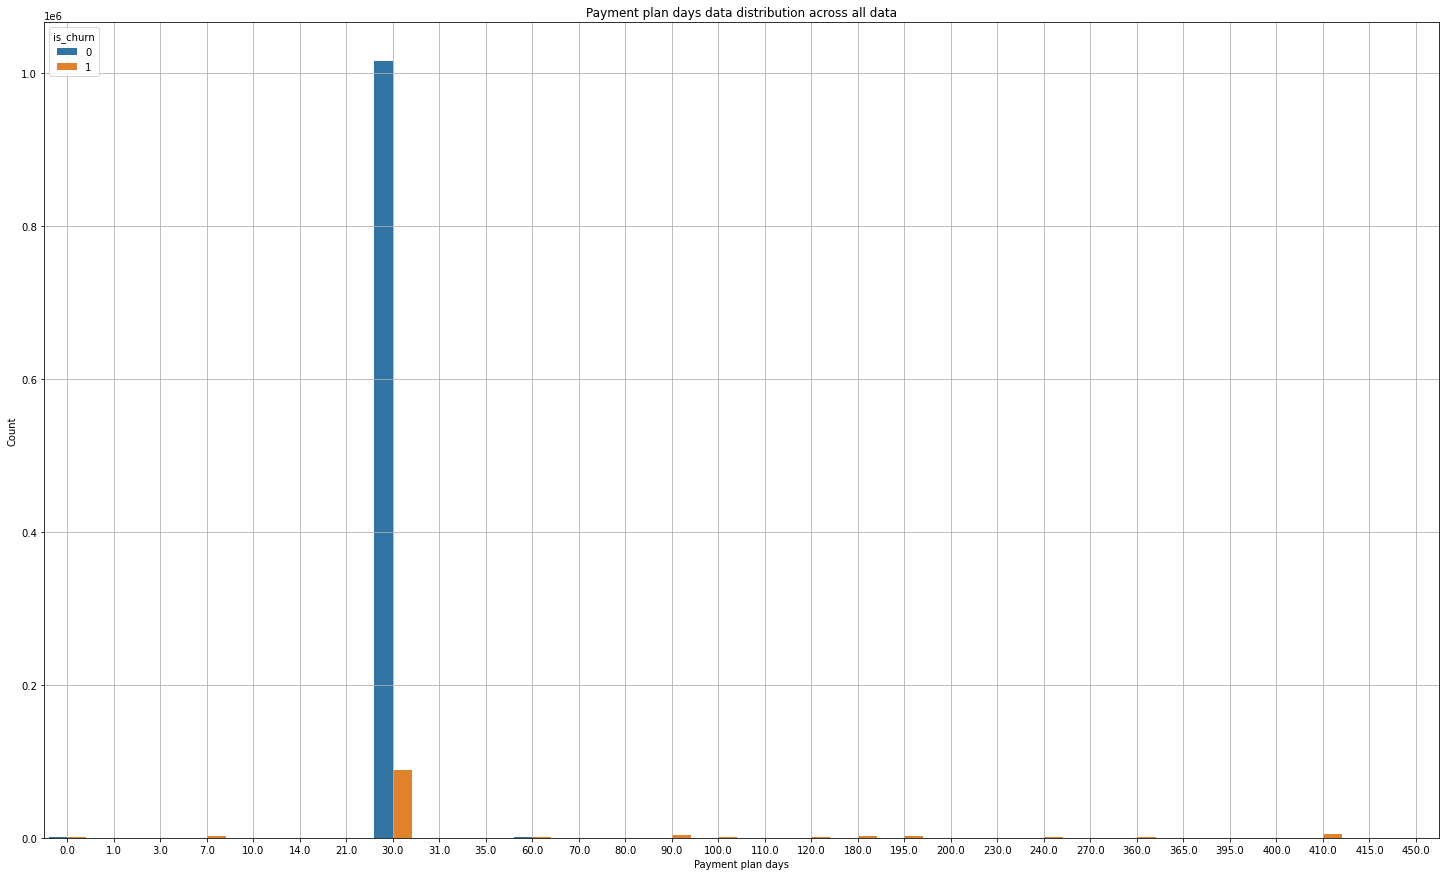

    payment_plan_days  is_churn  total_users  average_churned_users
7                30.0     89157      1104946               0.080689
27              410.0      4628         4680               0.988889
13               90.0      3645         3911               0.931987
18              195.0      3008         3030               0.992739
17              180.0      2971         2995               0.991987
3                 7.0      2661         2876               0.925243
0                 0.0       538         1914               0.281087
10               60.0      1279         1812               0.705850
21              240.0      1449         1481               0.978393
23              360.0      1225         1243               0.985519
16              120.0       790          808               0.977723
14              100.0       655          659               0.993930
4                10.0       351          361               0.972299
25              395.0       293          293    

In [49]:
# count plot
countplot1_analysis(train_transactions, 'payment_plan_days', 'Payment plan days', 'Count', 'Payment plan days data distribution across all data', (25, 15),'is_churn', False)

**Almost a million of users(94.5%) purchased 30 days subsription, while only fewer and fewer users purchased rest of the plans. And beside 30 days plan, the users who purchased another plan have very high tendency to leave the service.**

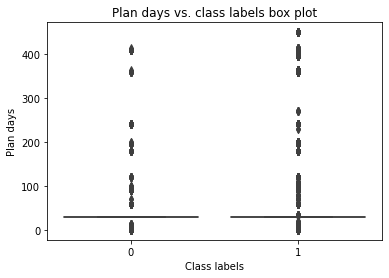

In [50]:
# boxplot
boxplot(train_transactions, 'payment_plan_days', 'Class labels', 'Plan days', 'Plan days vs. class labels box plot', col1='is_churn')

**It seems like there are a lot of outlier values, so it's better to get a range and set all the values beside this range to nan, and then after fill those nan using median value.**

In [51]:
# getting 0th to 100th percentiles of plan days feature
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_transactions['payment_plan_days'], i))
print('*' * 50)
print('*' * 50)
# getting 90th to 100th percentiles of plan days feature
for i in range(90, 101, 1):
    print(i, 'th percentile value is: ', np.nanpercentile(train_transactions['payment_plan_days'], i))

0 th percentile value is:  0.0
10 th percentile value is:  30.0
20 th percentile value is:  30.0
30 th percentile value is:  30.0
40 th percentile value is:  30.0
50 th percentile value is:  30.0
60 th percentile value is:  30.0
70 th percentile value is:  30.0
80 th percentile value is:  30.0
90 th percentile value is:  30.0
100 th percentile value is:  450.0
**************************************************
**************************************************
90 th percentile value is:  30.0
91 th percentile value is:  30.0
92 th percentile value is:  30.0
93 th percentile value is:  30.0
94 th percentile value is:  30.0
95 th percentile value is:  30.0
96 th percentile value is:  30.0
97 th percentile value is:  30.0
98 th percentile value is:  30.0
99 th percentile value is:  195.0
100 th percentile value is:  450.0


**So the minimum plan days I can take is 0 and maximum is 30, beyond this range I can set everything as nan.**

In [52]:
# setting everything to nan beyond the range(0-30)
train_transactions['payment_plan_days'] = train_transactions['payment_plan_days'].apply(lambda x: x if (x <= 30.0) else np.nan)

In [53]:
# getting median
np.nanmedian(train_transactions['payment_plan_days'])

30.0

###  Transactions dataset (plan_list_price)-

In [54]:
# number of unique plan list price
x = train_transactions['plan_list_price'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['nan', '180.000000', '0.000000', '300.000000', '149.000000', '99.000000', '1788.000000', '477.000000', '298.000000', '536.000000', '600.000000', '894.000000', '100.000000', '129.000000', '1200.000000', '447.000000', '480.000000', '350.000000', '1299.000000', '930.000000', '150.000000', '1599.000000', '799.000000', '119.000000', '120.000000', '400.000000', '35.000000', '1150.000000', '450.000000', '1000.000000', '500.000000', '70.000000', '2000.000000', '1.000000', '1399.000000', '134.000000', '699.000000', '126.000000', '210.000000', '596.000000', '105.000000', '131.000000', '265.000000', '143.000000']
44


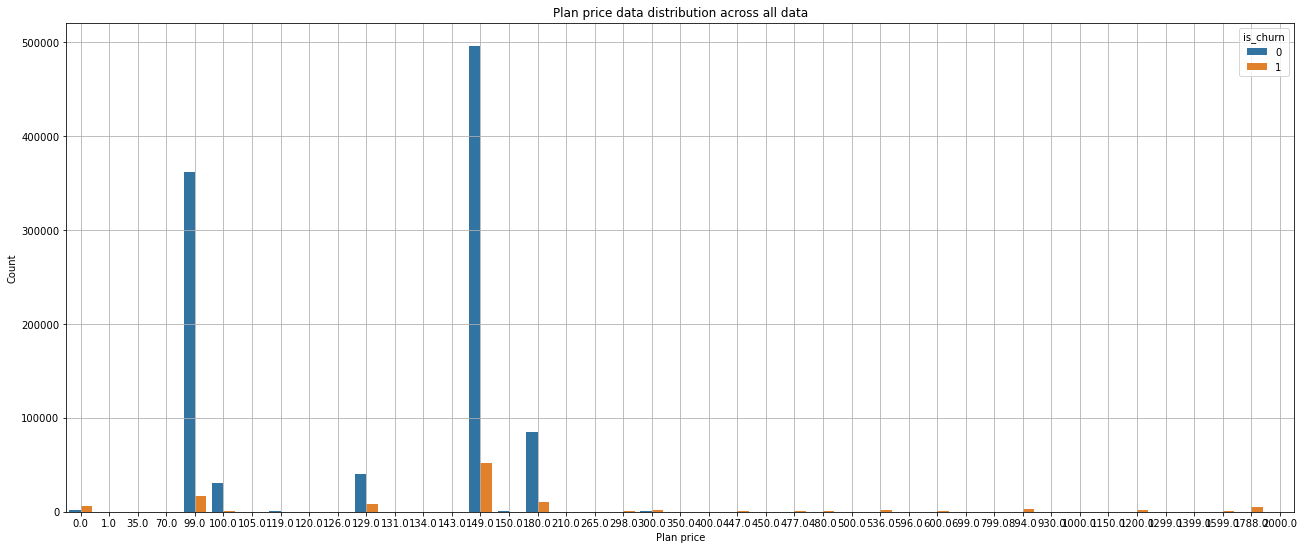

    plan_list_price  is_churn  total_users  average_churned_users
14            149.0     52084       548040               0.095037
4              99.0     16922       378667               0.044688
16            180.0     10542        95909               0.109917
10            129.0      7898        47696               0.165590
5             100.0       978        31927               0.030632
0               0.0      5781         7599               0.760758
41           1788.0      4673         4723               0.989414
33            894.0      3006         3028               0.992734
28            536.0      2350         2370               0.991561
20            300.0      1421         2002               0.709790
37           1200.0      1953         1980               0.986364
15            150.0       302         1598               0.188986
25            477.0      1136         1148               0.989547
30            600.0       793          797               0.994981
23        

In [55]:
# count plot
countplot1_analysis(train_transactions, 'plan_list_price', 'Plan price', 'Count', 'Plan price data distribution across all data', (22, 9),'is_churn', False)

**Observations: -**
    
1. Lots of users(almost 94.25%) have their plan price, like 99, 100, 129, 149, 180 NTD.
2. The users having plan price 129, and 180 have more tendency of churing(which is greater than 10%).
3. The users having plan price 149 have also high tendency of churnining.
4. Beside these five values if a user purchased any other plan then there is very high tendency of churning.

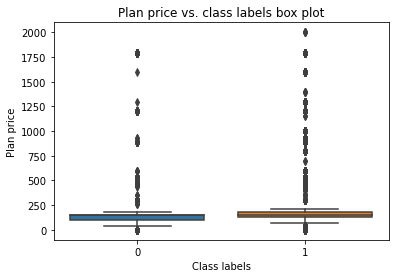

In [56]:
# boxplot
boxplot(train_transactions, 'plan_list_price', 'Class labels', 'Plan price', 'Plan price vs. class labels box plot', col1='is_churn')

**Again it is also containing several outliers, so it's better to get the range of min and max value for plan price.**

In [57]:
# getting 0th to 100th percentiles of plan days feature
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_transactions['plan_list_price'], i))
print('*' * 50)
print('*' * 50)
# getting 90th to 100th percentiles of plan days feature
for i in range(90, 101, 1):
    print(i, 'th percentile value is: ', np.nanpercentile(train_transactions['plan_list_price'], i))

0 th percentile value is:  0.0
10 th percentile value is:  99.0
20 th percentile value is:  99.0
30 th percentile value is:  99.0
40 th percentile value is:  129.0
50 th percentile value is:  149.0
60 th percentile value is:  149.0
70 th percentile value is:  149.0
80 th percentile value is:  149.0
90 th percentile value is:  180.0
100 th percentile value is:  2000.0
**************************************************
**************************************************
90 th percentile value is:  180.0
91 th percentile value is:  180.0
92 th percentile value is:  180.0
93 th percentile value is:  180.0
94 th percentile value is:  180.0
95 th percentile value is:  180.0
96 th percentile value is:  180.0
97 th percentile value is:  180.0
98 th percentile value is:  180.0
99 th percentile value is:  600.0
100 th percentile value is:  2000.0


**So minimum value that I got is 0(first month user or users who want to see ads) and the maximum value is 180. So beyond this I can set everything to nan.**

In [58]:
# setting everything to nan beyond range(0-180)
train_transactions['plan_list_price'] = train_transactions['plan_list_price'].apply(lambda x: x if (x <= 180.0) else np.nan)

In [59]:
# getting median
np.nanmedian(train_transactions['plan_list_price'])

149.0

### 3.4.4 Transactions dataset (actual_amount_paid)-

In [60]:
# number of unique actual plan list price
x = train_transactions['actual_amount_paid'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['nan', '180.000000', '0.000000', '300.000000', '149.000000', '99.000000', '1788.000000', '477.000000', '298.000000', '536.000000', '600.000000', '894.000000', '100.000000', '129.000000', '1200.000000', '447.000000', '480.000000', '350.000000', '1299.000000', '930.000000', '150.000000', '1599.000000', '799.000000', '119.000000', '400.000000', '35.000000', '1150.000000', '450.000000', '120.000000', '1000.000000', '500.000000', '70.000000', '2000.000000', '1.000000', '1399.000000', '134.000000', '699.000000', '127.000000', '210.000000', '596.000000', '105.000000', '131.000000', '265.000000', '143.000000']
44


**There are 44 unique plan prices are present including nan and 0.**

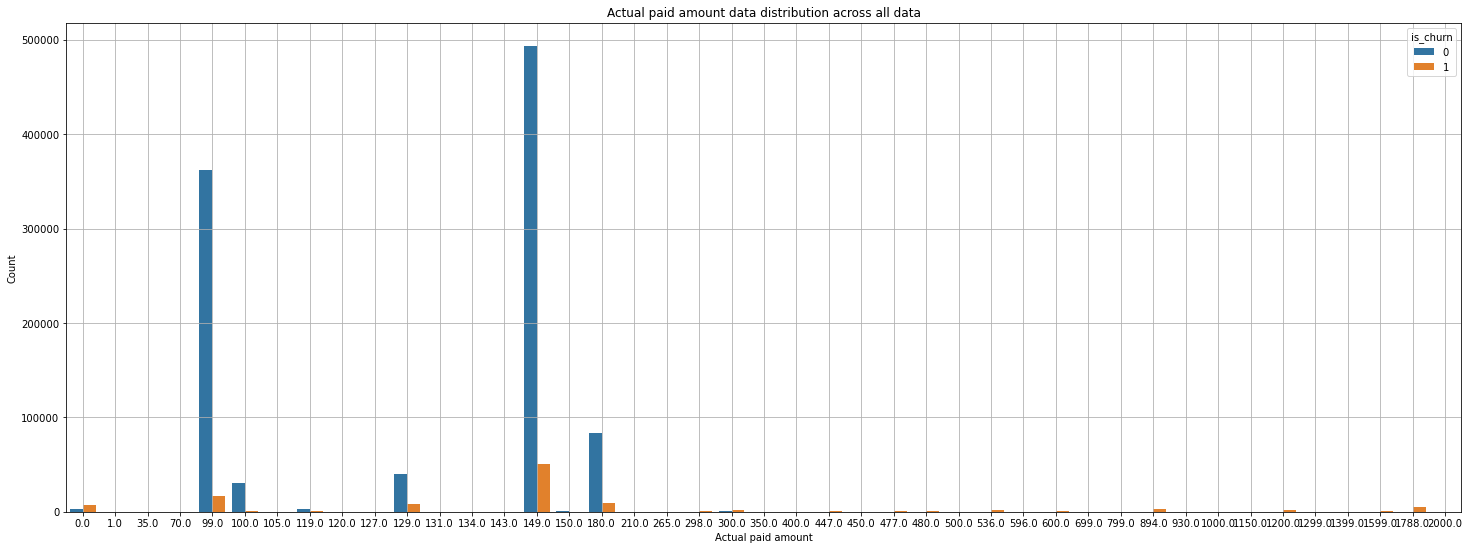

    actual_amount_paid  is_churn  total_users  average_churned_users
14               149.0     50832       544412               0.093370
4                 99.0     16957       379426               0.044691
16               180.0      9373        92785               0.101018
10               129.0      7940        48093               0.165097
5                100.0       979        31941               0.030650
0                  0.0      7189         9823               0.731854
41              1788.0      4673         4723               0.989414
7                119.0      1081         3888               0.278035
33               894.0      3006         3028               0.992734
28               536.0      2350         2370               0.991561
20               300.0      1421         2002               0.709790
37              1200.0      1953         1980               0.986364
15               150.0       302         1597               0.189105
25               477.0      1136  

In [61]:
# count plot
countplot1_analysis(train_transactions, 'actual_amount_paid', 'Actual paid amount', 'Count', 'Actual paid amount data distribution across all data', (25, 9),'is_churn', False)

**The distribution and churning rate looks very similar to the plan price, it may possible that with the subtle difference.**

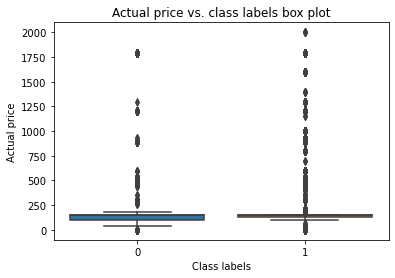

In [62]:
# boxplot
boxplot(train_transactions, 'actual_amount_paid', 'Class labels', 'Actual price', 'Actual price vs. class labels box plot', col1='is_churn')

**Again it is also containing several outliers, so it's better to get the range of min and max value for plan price.**

In [63]:
# getting 0th to 100th percentiles of plan days feature
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_transactions['actual_amount_paid'], i))
print('*' * 50)
print('*' * 50)
# getting 90th to 100th percentiles of plan days feature
for i in range(90, 101, 1):
    print(i, 'th percentile value is: ', np.nanpercentile(train_transactions['actual_amount_paid'], i))

0 th percentile value is:  0.0
10 th percentile value is:  99.0
20 th percentile value is:  99.0
30 th percentile value is:  99.0
40 th percentile value is:  129.0
50 th percentile value is:  149.0
60 th percentile value is:  149.0
70 th percentile value is:  149.0
80 th percentile value is:  149.0
90 th percentile value is:  150.0
100 th percentile value is:  2000.0
**************************************************
**************************************************
90 th percentile value is:  150.0
91 th percentile value is:  180.0
92 th percentile value is:  180.0
93 th percentile value is:  180.0
94 th percentile value is:  180.0
95 th percentile value is:  180.0
96 th percentile value is:  180.0
97 th percentile value is:  180.0
98 th percentile value is:  180.0
99 th percentile value is:  600.0
100 th percentile value is:  2000.0


**So again 0 for min and 180 for max, and setting everything beyond this to nan.**

In [64]:
# setting everything to nan beyond range(0-180)
train_transactions['actual_amount_paid'] = train_transactions['actual_amount_paid'].apply(lambda x: x if (x <= 180.0) else np.nan)

**Getting median so that I can impute value in place of nan.**

In [65]:
# getting median
np.nanmedian(train_transactions['actual_amount_paid'])

149.0

###  Transactions dataset (is_auto_renew)-

In [66]:
# number of unique auto renew codes
print(train_transactions['is_auto_renew'].unique())
print(len(train_transactions['is_auto_renew'].unique()))

[nan  0.  1.]
3


**There are 3 unique auto renew codes, including nan. Since 2 is not present as a auto renew code, So I can replace all the nan with 2 at data preprocessing. Which typically means that "not mentioned".**

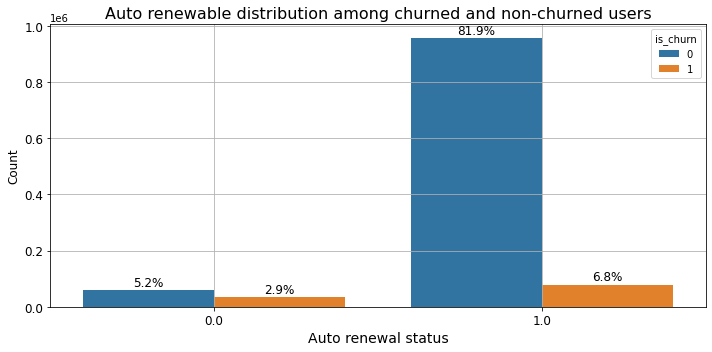

   is_auto_renew  is_churn  total_users  average_churned_users
1            1.0     79399      1037286               0.076545
0            0.0     34174        94750               0.360675


In [67]:
# countplot
countplot_analysis(train_transactions, 'is_auto_renew', 'Auto renewal status', 'Count', 'Auto renewable distribution among churned and non-churned users', (10,5), col2='is_churn', top=False)

**Observations: -**
    
1. There are a lot of users(almost 89%) who setted up their account for auto renew of a plan.
2. While there are only fewer users who hasn't setted up their account for auto renew of a plan, and among 36% of them churned.

**In order to impute missing value I can add one more category with the value 2.**

### 3.4.6 Transactions dataset (transaction_date)-

In [68]:
# converting float date to datetime
train_transactions['transaction_date'] = pd.to_datetime(train_transactions['transaction_date'], format='%Y%m%d')
# getting head of the feature
train_transactions['transaction_date'].head()

0          NaT
1   2017-03-11
2   2017-03-11
3   2017-03-14
4   2015-09-08
Name: transaction_date, dtype: datetime64[ns]

In [69]:
# adding year to df
train_transactions['year'] = train_transactions['transaction_date'].dt.year.values
# adding month to df
train_transactions['month'] = train_transactions['transaction_date'].dt.month.values

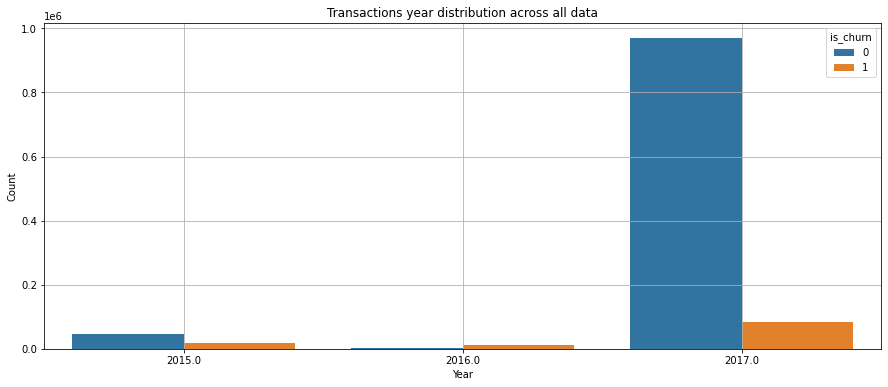

     year  is_churn  total_users  average_churned_users
2  2017.0     83410      1052889               0.079220
0  2015.0     18726        65821               0.284499
1  2016.0     11437        13326               0.858247


In [70]:
# count plot
countplot1_analysis(train_transactions, 'year', 'Year', 'Count', 'Transactions year distribution across all data', (15,6),'is_churn', False)

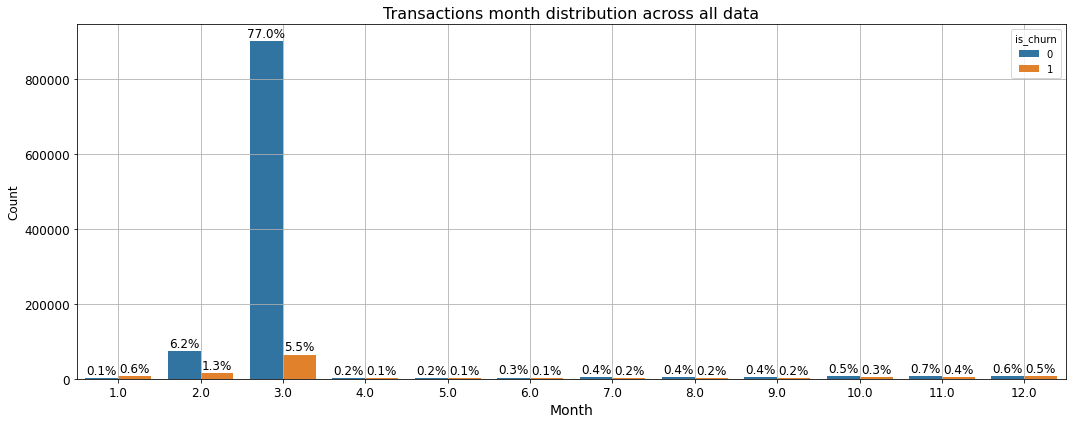

    month  is_churn  total_users  average_churned_users
2     3.0     64728       964972               0.067078
1     2.0     14896        87810               0.169639
11   12.0      6258        13328               0.469538
10   11.0      4485        12320               0.364042
9    10.0      3671        10022               0.366294
0     1.0      7138         8838               0.807649
8     9.0      2874         8014               0.358622
7     8.0      2631         7352               0.357862
6     7.0      2751         6844               0.401958
5     6.0      1678         5036               0.333201
4     5.0      1386         4186               0.331104
3     4.0      1077         3314               0.324985


In [71]:
# count plot
countplot_analysis(train_transactions, 'month', 'Month', 'Count', 'Transactions month distribution across all data', (15,6),'is_churn', False)

**It's obvious because KKBox already mentioned that train data comes for the month of march 2017. So except march there is a very high churning rate.**

**Getting median transaction date for the data to impute in place of nan values.**

In [72]:
dates = list(train_transactions.sort_values('transaction_date')['transaction_date'])
print(dates[len(dates)//2])

2017-03-16 00:00:00


### 3.4.7 Transactions dataset (membership_expire_date)-

In [73]:
# converting float date to datetime
train_transactions['membership_expire_date'] = pd.to_datetime(train_transactions['membership_expire_date'], format='%Y%m%d')
# getting head of the feature
train_transactions['membership_expire_date'].head()

0          NaT
1   2017-04-11
2   2017-03-14
3   2017-06-15
4   2017-06-08
Name: membership_expire_date, dtype: datetime64[ns]

In [74]:
# adding year to df
train_transactions['ex_year'] = train_transactions['membership_expire_date'].dt.year.values
# adding month to df
train_transactions['ex_month'] = train_transactions['membership_expire_date'].dt.month.values

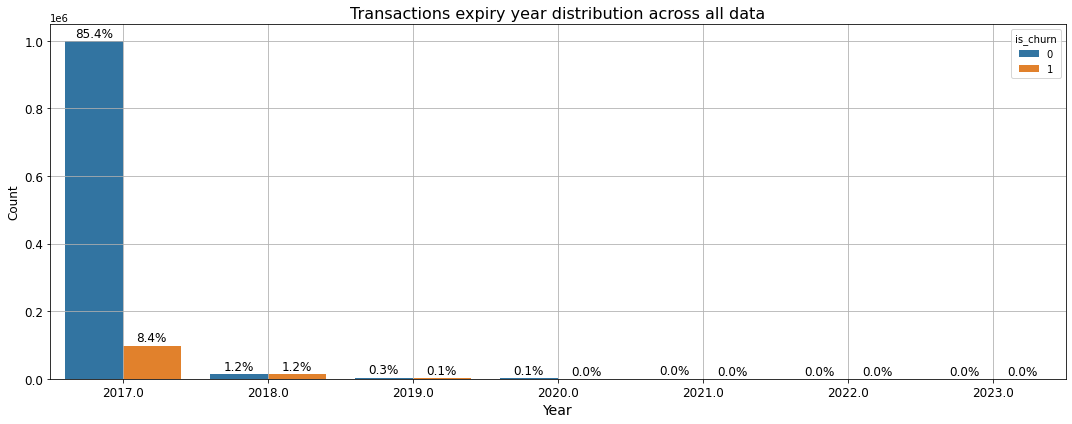

   ex_year  is_churn  total_users  average_churned_users
0   2017.0     98410      1097358               0.089679
1   2018.0     13556        27884               0.486157
2   2019.0      1262         4959               0.254487
3   2020.0       260         1349               0.192735
4   2021.0        64          382               0.167539
5   2022.0        20           85               0.235294
6   2023.0         1           19               0.052632


In [75]:
# count plot
countplot_analysis(train_transactions, 'ex_year', 'Year', 'Count', 'Transactions expiry year distribution across all data', (15,6),'is_churn', False)

**Lots of users(almost 94%) whos transactions expires on 2017. And there are some other years also avialable, but it seems like the users who purchased long duration plans has higher chances of churn.**

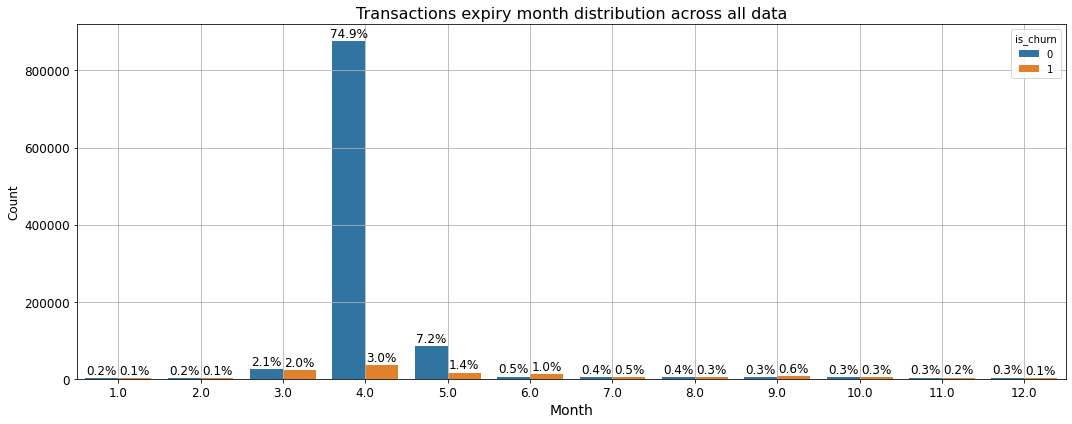

    ex_month  is_churn  total_users  average_churned_users
3        4.0     35546       911224               0.039009
4        5.0     15864        99891               0.158813
2        3.0     23105        47600               0.485399
5        6.0     11669        17470               0.667945
8        9.0      7186        11145               0.644773
6        7.0      5363        10467               0.512372
7        8.0      3703         8217               0.450651
9       10.0      3908         7622               0.512726
10      11.0      2872         6184               0.464424
11      12.0      1677         4609               0.363853
0        1.0      1463         4180               0.350000
1        2.0      1217         3427               0.355121


In [76]:
# count plot
countplot_analysis(train_transactions, 'ex_month', 'Month', 'Count', 'Transactions expiry month distribution across all data', (15,6),'is_churn', False)

**There are almost 78% users have their subscription expire on the month of April. with quite less number of churn(3.9%).**

**Getting median date for imputing in place of nan dates.**

In [77]:
dates = list(train_transactions.sort_values('membership_expire_date')['membership_expire_date'])
print(dates[len(dates)//2])

2017-04-19 00:00:00


### 3.4.8 Transactions dataset (is_cancel)-

In [78]:
# number of unique city codes
print(train_transactions['is_cancel'].unique())
print(len(train_transactions['is_cancel'].unique()))

[nan  0.  1.]
3


**There are 3 unique is_cancel codes, including nan. Since 2 is not present as a auto renew code, So I can replace all the nan with 2. Which typically means that "not mentioned" at data preprocessing.**

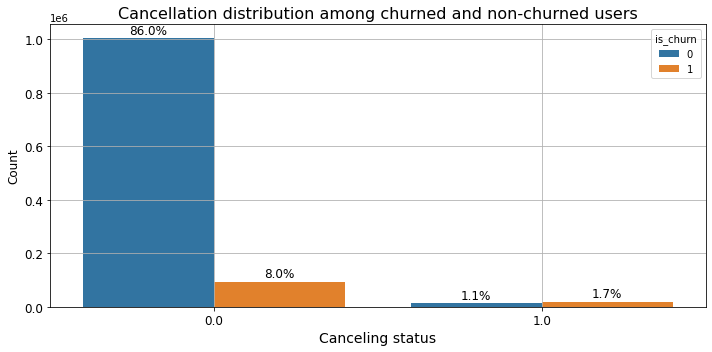

   is_cancel  is_churn  total_users  average_churned_users
0        0.0     93983      1099153               0.085505
1        1.0     19590        32883               0.595749


In [79]:
# count plot
countplot_analysis(train_transactions, 'is_cancel', 'Canceling status', 'Count', 'Cancellation distribution among churned and non-churned users', (10,5), col2='is_churn', top=False)

## Bi-variate Analysis

**Since there are only 8 features, so best way to perform bi-variate analysis is Pair plot. But here I am plotting pair plot for 6 feautes after extracting two date features.**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.01, 'Bi-variate analysis across all features')

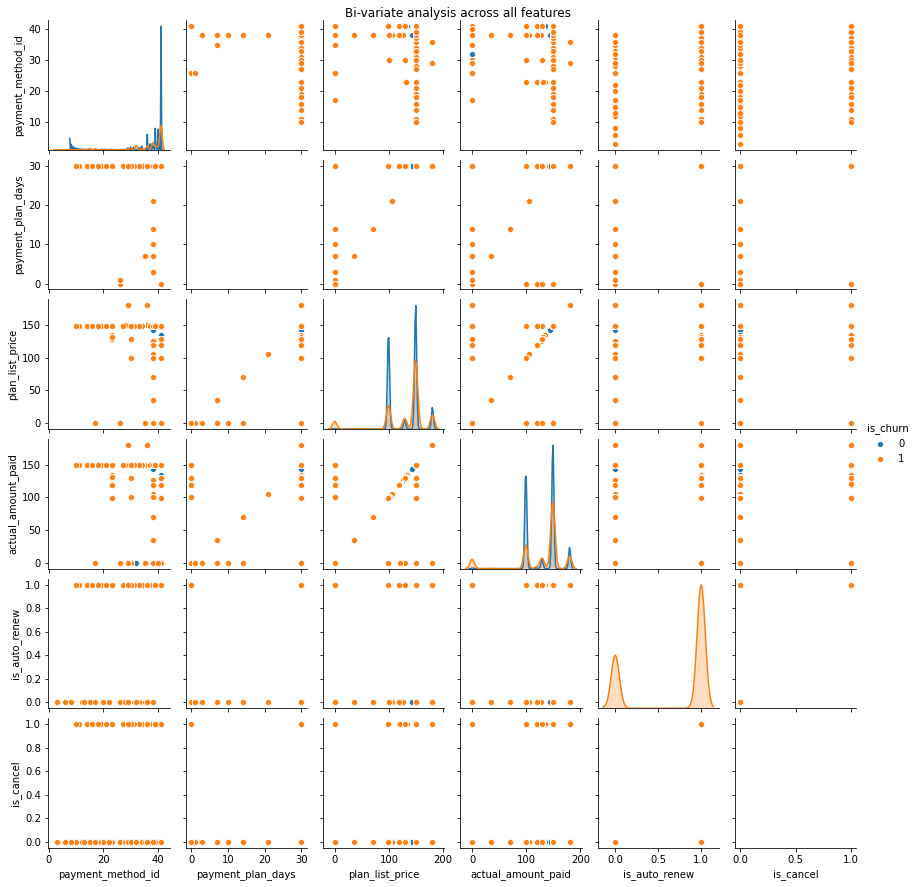

In [80]:
# pair plot
g = sns.pairplot(train_transactions, vars=['payment_method_id', 'payment_plan_days', 'plan_list_price', 'actual_amount_paid', 'is_auto_renew', 'is_cancel'], height=2, hue='is_churn')
g.fig.suptitle('Bi-variate analysis across all features', y=1.01)

**Observation: -**

1. There are no two features, which can easily separate churned users with non-churned users.
2. So we can use these features for feature engineering, because uni-variate analysis looks good.

In [81]:
# reading csv
logs_data = pd.read_csv(r"C:\Users\Tim\Downloads\PA-Project\user_log.csv")
# getting the head (top 5 rows) of df
logs_data.head()

msno      date  num_25  num_50  \
0  u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=  20170331       8       4   
1  nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=  20170330       2       2   
2  2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=  20170331      52       3   
3  ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=  20170331     176       4   
4  EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=  20170331       2       1   

   num_75  num_985  num_100  num_unq  total_secs  
0       0        1       21       18    6309.273  
1       1        0        9       11    2390.699  
2       5        3       84      110   23203.337  
3       2        2       19      191    7100.454  
4       0        1      112       93   28401.558

In [82]:
# shape of the dataframe
logs_data.shape

(18396362, 9)

**The user logs dataset has 18396362 rows and 9 features(columns). It is having large number of observations, because it represent user behaviour day by day.**

In [83]:
# merging train dataset with transactions dataset
train_logs = pd.merge(train_data, logs_data, on='msno', how='left')
# getting the head (top 5) rows of df
train_logs.head()

msno  is_churn        date  num_25  \
0  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1  20170305.0     7.0   
1  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1  20170301.0   138.0   
2  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1  20170319.0     0.0   
3  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1  20170316.0    15.0   
4  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1  20170310.0     0.0   

   num_50  num_75  num_985  num_100  num_unq  total_secs  
0     0.0     3.0      5.0     71.0     68.0   17599.893  
1    19.0     7.0      1.0     21.0    158.0    8830.433  
2     0.0     0.0      0.0     34.0     17.0    7883.313  
3     0.0     0.0      1.0     38.0     17.0    9029.227  
4     0.0     0.0      0.0      8.0      8.0    1870.110

In [84]:
# shape of the dataframe
train_logs.shape

(13749353, 10)

**The train logs dataset has 13749353 rows and 10 features(9 columns and a class label).**

In [85]:
# getting basic information about the dataframe
train_logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13749353 entries, 0 to 13749352
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   msno        object 
 1   is_churn    int64  
 2   date        float64
 3   num_25      float64
 4   num_50      float64
 5   num_75      float64
 6   num_985     float64
 7   num_100     float64
 8   num_unq     float64
 9   total_secs  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.1+ GB


**All of the features are float features.**

In [86]:
# checking for duplicate values
train_logs.duplicated().any()

False

**There are no duplicate rows/observations.**

In [87]:
# getting features wise null values (number)
train_logs.isnull().sum()

msno               0
is_churn           0
date          216409
num_25        216409
num_50        216409
num_75        216409
num_985       216409
num_100       216409
num_unq       216409
total_secs    216409
dtype: int64

**There are reasonable number of null values in each of the column.**

## Univariate Analysis

### 3.6.1 User logs dataset (date)-

In [88]:
# converting float date to datetime
train_logs['date'] = pd.to_datetime(train_logs['date'], format='%Y%m%d')
# getting head of the feature
train_logs['date'].head()

0   2017-03-05
1   2017-03-01
2   2017-03-19
3   2017-03-16
4   2017-03-10
Name: date, dtype: datetime64[ns]

**Since most of the data belong to march 2017, so I can analyze it on the day and weekday basis.**

In [89]:
train_logs['day'] = train_logs['date'].dt.day.values
train_logs['weekday'] = train_logs['date'].dt.day_name().values

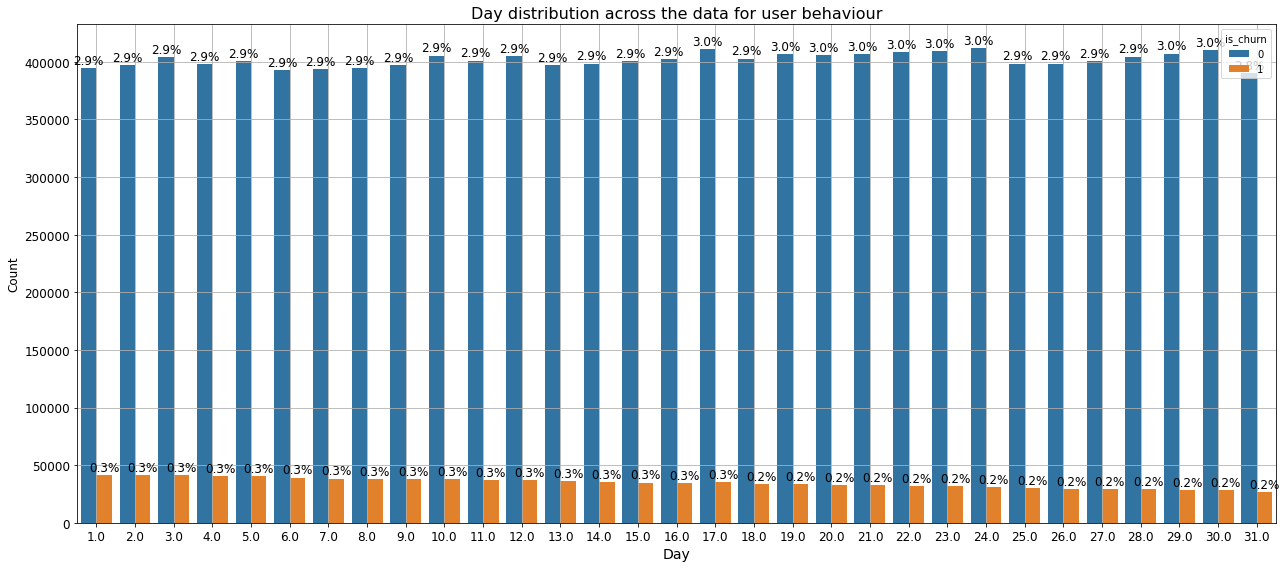

     day  is_churn  total_users  average_churned_users
16  17.0     35028       446342               0.078478
2    3.0     41604       445568               0.093373
9   10.0     37966       443487               0.085608
23  24.0     31232       443150               0.070477
11  12.0     36994       441680               0.083757
4    5.0     40448       441299               0.091657
22  23.0     31678       441196               0.071800
21  22.0     32146       440319               0.073006
18  19.0     33551       440074               0.076239
20  21.0     32577       439348               0.074149
19  20.0     32948       439081               0.075039
29  30.0     28428       438972               0.064760
1    2.0     41475       438937               0.094490
3    4.0     40649       438886               0.092619
10  11.0     37074       438174               0.084610
15  16.0     34772       437370               0.079502
17  18.0     33731       436618               0.077255
0    1.0  

In [90]:
# count plot
countplot_analysis(train_logs, 'day', 'Day', 'Count', 'Day distribution across the data for user behaviour', (18,8),'is_churn', False)

**The distribution looks very similar for all the days, in fact churn user distribution also looks same for all days.**

In [92]:
# getting median
dates = list(train_logs.sort_values('date')['date'])
print(dates[len(dates)//2])

2017-03-16 00:00:00


### 3.6.2 User logs dataset (num_25)-

In [93]:
# number of track where unique listen time is less than 25 percent
x = train_logs['num_25'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['7.000000', '138.000000', '0.000000', '15.000000', '1.000000', '8.000000', '9.000000', '10.000000', '51.000000', '6.000000', '17.000000', '43.000000', '4.000000', '5.000000', '3.000000', '42.000000', '2.000000', '21.000000', 'nan', '12.000000', '33.000000', '16.000000', '11.000000', '35.000000', '14.000000', '13.000000', '69.000000', '26.000000', '55.000000', '46.000000', '73.000000', '39.000000', '165.000000', '47.000000', '20.000000', '255.000000', '23.000000', '40.000000', '31.000000', '27.000000', '25.000000', '22.000000', '18.000000', '41.000000', '95.000000', '30.000000', '34.000000', '36.000000', '62.000000', '57.000000', '49.000000', '44.000000', '29.000000', '32.000000', '119.000000', '91.000000', '38.000000', '54.000000', '60.000000', '28.000000', '53.000000', '45.000000', '84.000000', '19.000000', '24.000000', '66.000000', '59.000000', '96.000000', '50.000000', '87.000000', '56.000000', '67.000000', '78.000000', '37.000000', '48.000000', '160.000000', '102.000000', '135.000

**So there are 685 unique values, so I cannot simply plot the countplot.**

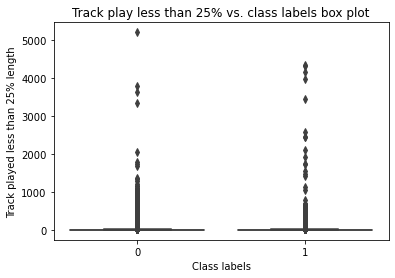

In [94]:
# boxplot
boxplot(train_logs, 'num_25', 'Class labels', 'Track played less than 25% length', 'Track play less than 25% vs. class labels box plot', col1='is_churn')

**There are a lot of outliers present so it's better to get a lower and upper value, so that beyond that limit I can keep them nan.**

In [95]:
# getting 0th to 100th percentiles of track played less than 25% of track length
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_logs['num_25'], i))

0 th percentile value is:  0.0
10 th percentile value is:  0.0
20 th percentile value is:  0.0
30 th percentile value is:  1.0
40 th percentile value is:  1.0
50 th percentile value is:  2.0
60 th percentile value is:  3.0
70 th percentile value is:  5.0
80 th percentile value is:  9.0
90 th percentile value is:  15.0
100 th percentile value is:  5213.0


**So 0 to 15 seems as a good range, so beyond this range I can set all the outliers as nan.**

In [96]:
# setting everything to nan beyond range(0-15)
train_logs['num_25'] = train_logs['num_25'].apply(lambda x: x if (x <= 15.0) else np.nan)

**Getting median for nan imputation**

In [97]:
# getting median
np.nanmedian(train_logs['num_25'])

2.0

###  User logs dataset (num_50)-

In [98]:
# number of track where unique listen time is less than 50 percent
x = train_logs['num_50'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['0.000000', '19.000000', '1.000000', '3.000000', '10.000000', '6.000000', '2.000000', '5.000000', '4.000000', 'nan', '17.000000', '15.000000', '7.000000', '8.000000', '12.000000', '9.000000', '26.000000', '11.000000', '99.000000', '80.000000', '16.000000', '50.000000', '25.000000', '37.000000', '13.000000', '33.000000', '27.000000', '76.000000', '63.000000', '55.000000', '24.000000', '23.000000', '28.000000', '14.000000', '31.000000', '78.000000', '29.000000', '32.000000', '64.000000', '41.000000', '18.000000', '34.000000', '45.000000', '109.000000', '49.000000', '20.000000', '104.000000', '22.000000', '44.000000', '52.000000', '30.000000', '42.000000', '21.000000', '36.000000', '96.000000', '47.000000', '141.000000', '48.000000', '53.000000', '70.000000', '40.000000', '54.000000', '35.000000', '59.000000', '39.000000', '38.000000', '51.000000', '57.000000', '115.000000', '92.000000', '73.000000', '43.000000', '46.000000', '58.000000', '62.000000', '90.000000', '69.000000', '85.000000

**There are 311 unique values for this feature.**

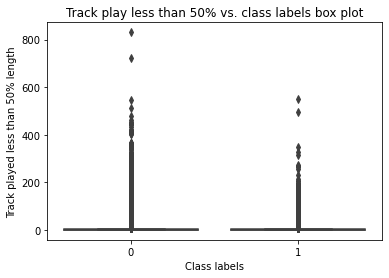

In [99]:
# boxplot
boxplot(train_logs, 'num_50', 'Class labels', 'Track played less than 50% length', 'Track play less than 50% vs. class labels box plot', col1='is_churn')

**Again it seems like there are very few tracks available that user listen till 50% of it's length, and rest of them are outliers.**

In [100]:
# getting 0th to 100th percentiles of track played less than 50% of track length
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_logs['num_50'], i))

0 th percentile value is:  0.0
10 th percentile value is:  0.0
20 th percentile value is:  0.0
30 th percentile value is:  0.0
40 th percentile value is:  0.0
50 th percentile value is:  0.0
60 th percentile value is:  1.0
70 th percentile value is:  1.0
80 th percentile value is:  2.0
90 th percentile value is:  4.0
100 th percentile value is:  831.0


**So 0 to 4 seems as a good range, so beyond this range I can set all the outliers as nan.**

In [101]:
# setting everything to nan beyond limit(0-4)
train_logs['num_50'] = train_logs['num_50'].apply(lambda x: x if (x <= 4.0) else np.nan)

**Getting median for nan imputation.**

In [102]:
# getting median
np.nanmedian(train_logs['num_50'])

0.0

### 3.6.4 User logs dataset (num_75)-

In [103]:
# number of track where unique listen time is less than 75 percent
x = train_logs['num_75'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['3.000000', '7.000000', '0.000000', '1.000000', '4.000000', '2.000000', '5.000000', 'nan', '10.000000', '6.000000', '8.000000', '9.000000', '96.000000', '14.000000', '11.000000', '72.000000', '13.000000', '23.000000', '16.000000', '24.000000', '39.000000', '20.000000', '42.000000', '18.000000', '21.000000', '12.000000', '31.000000', '32.000000', '19.000000', '15.000000', '25.000000', '22.000000', '58.000000', '17.000000', '29.000000', '30.000000', '38.000000', '59.000000', '49.000000', '37.000000', '71.000000', '47.000000', '26.000000', '44.000000', '87.000000', '69.000000', '78.000000', '61.000000', '46.000000', '33.000000', '27.000000', '53.000000', '28.000000', '48.000000', '36.000000', '34.000000', '62.000000', '54.000000', '95.000000', '60.000000', '56.000000', '85.000000', '50.000000', '167.000000', '82.000000', '55.000000', '35.000000', '73.000000', '88.000000', '40.000000', '68.000000', '41.000000', '43.000000', '161.000000', '84.000000', '57.000000', '64.000000', '83.000000',

**So there are 174 unique values present.**

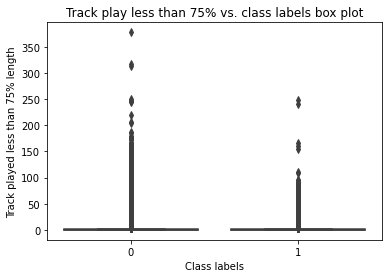

In [104]:
# boxplot
boxplot(train_logs, 'num_75', 'Class labels', 'Track played less than 75% length', 'Track play less than 75% vs. class labels box plot', col1='is_churn')

**Again lot of outliers present, so removing outliers first.**

In [105]:
# getting 0th to 100th percentiles tracks played less than 75% of track length
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_logs['num_75'], i))

0 th percentile value is:  0.0
10 th percentile value is:  0.0
20 th percentile value is:  0.0
30 th percentile value is:  0.0
40 th percentile value is:  0.0
50 th percentile value is:  0.0
60 th percentile value is:  1.0
70 th percentile value is:  1.0
80 th percentile value is:  2.0
90 th percentile value is:  3.0
100 th percentile value is:  378.0


**So 0 to 3 seems as a good range, so beyond this range I can set all the outliers as nan.**

In [106]:
# # setting everything to nan beyond limit(0-3)
train_logs['num_75'] = train_logs['num_75'].apply(lambda x: x if (x <= 3.0) else np.nan)

**Getting median for nan imputation.**

In [107]:
# getting median
np.nanmedian(train_logs['num_75'])

0.0

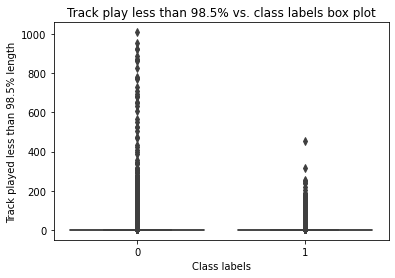

In [109]:
# boxplot
boxplot(train_logs, 'num_985', 'Class labels', 'Track played less than 98.5% length', 'Track play less than 98.5% vs. class labels box plot', col1='is_churn')

**Again lot of outliers present, so removing outliers first.**

In [110]:
# getting 0th to 100th percentiles of tracks played less than 50% of track length
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_logs['num_985'], i))

0 th percentile value is:  0.0
10 th percentile value is:  0.0
20 th percentile value is:  0.0
30 th percentile value is:  0.0
40 th percentile value is:  0.0
50 th percentile value is:  0.0
60 th percentile value is:  1.0
70 th percentile value is:  1.0
80 th percentile value is:  2.0
90 th percentile value is:  3.0
100 th percentile value is:  1010.0


**So 0 to 3 seems as a good range, so beyond this range I can set all the outliers as nan.**

###  User logs dataset (num_100)-

In [113]:
# number of track where unique listen time is over 50 percent
x = train_logs['num_100'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['71.000000', '21.000000', '34.000000', '38.000000', '8.000000', '31.000000', '17.000000', '5.000000', '1.000000', '6.000000', '86.000000', '0.000000', '7.000000', '4.000000', '3.000000', '47.000000', '16.000000', '10.000000', '15.000000', '35.000000', '2.000000', '28.000000', 'nan', '36.000000', '76.000000', '48.000000', '60.000000', '64.000000', '45.000000', '53.000000', '23.000000', '44.000000', '100.000000', '109.000000', '120.000000', '136.000000', '18.000000', '30.000000', '46.000000', '9.000000', '27.000000', '24.000000', '41.000000', '12.000000', '73.000000', '20.000000', '32.000000', '85.000000', '29.000000', '26.000000', '89.000000', '79.000000', '19.000000', '52.000000', '54.000000', '39.000000', '11.000000', '14.000000', '63.000000', '13.000000', '33.000000', '61.000000', '43.000000', '25.000000', '49.000000', '22.000000', '50.000000', '51.000000', '91.000000', '59.000000', '40.000000', '80.000000', '37.000000', '75.000000', '57.000000', '99.000000', '58.000000', '42.000000

**There are 1045 unique values available for this column.**

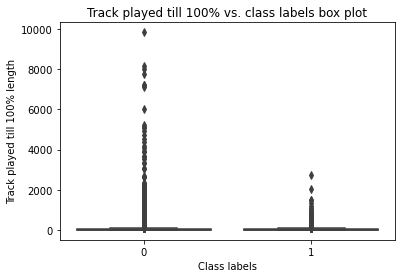

In [114]:
# boxplot
boxplot(train_logs, 'num_100', 'Class labels', 'Track played till 100% length', 'Track played till 100% vs. class labels box plot', col1='is_churn')

**Again lot of outliers present, so removing outliers first.**

In [115]:
# getting 0th to 100th percentiles of track played till 100% of track length
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_logs['num_100'], i))

0 th percentile value is:  0.0
10 th percentile value is:  2.0
20 th percentile value is:  5.0
30 th percentile value is:  8.0
40 th percentile value is:  12.0
50 th percentile value is:  16.0
60 th percentile value is:  22.0
70 th percentile value is:  31.0
80 th percentile value is:  44.0
90 th percentile value is:  74.0
100 th percentile value is:  9838.0


**So 0 to 74 seems as a good range, so beyond this range I can set all the outliers as nan.**

In [116]:
# setting everything to nan beyond limit(0-74)
train_logs['num_100'] = train_logs['num_100'].apply(lambda x: x if (x <= 74.0) else np.nan)

**Getting median for nan imputation.**

In [117]:
# getting median
np.nanmedian(train_logs['num_100'])

14.0

###  User logs dataset (num_unq)-

In [118]:
# number of unique tracks played
x = train_logs['num_unq'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['68.000000', '158.000000', '17.000000', '8.000000', '14.000000', '3.000000', '15.000000', '2.000000', '9.000000', '7.000000', '1.000000', '4.000000', '82.000000', '11.000000', '30.000000', '66.000000', '45.000000', '10.000000', '19.000000', '6.000000', '65.000000', '18.000000', 'nan', '36.000000', '61.000000', '43.000000', '33.000000', '23.000000', '41.000000', '49.000000', '62.000000', '34.000000', '32.000000', '39.000000', '5.000000', '22.000000', '20.000000', '26.000000', '25.000000', '12.000000', '69.000000', '72.000000', '40.000000', '28.000000', '59.000000', '13.000000', '35.000000', '38.000000', '29.000000', '95.000000', '67.000000', '46.000000', '85.000000', '84.000000', '51.000000', '99.000000', '73.000000', '31.000000', '78.000000', '63.000000', '80.000000', '170.000000', '27.000000', '47.000000', '21.000000', '37.000000', '24.000000', '16.000000', '70.000000', '60.000000', '55.000000', '44.000000', '77.000000', '93.000000', '86.000000', '274.000000', '94.000000', '48.000000

**There are 720 unique values present in that feature.**

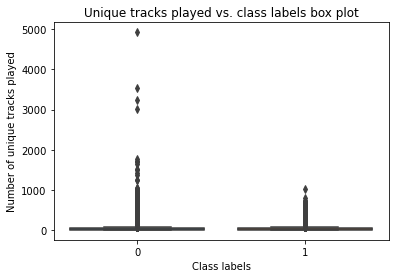

In [119]:
# boxplot
boxplot(train_logs, 'num_unq', 'Class labels', 'Number of unique tracks played', 'Unique tracks played vs. class labels box plot', col1='is_churn')

**Some small values are available, because it's day by day data. Also several outliers, so it's better to remove outliers.**

In [120]:
# getting 0th to 100th percentiles of number of unique tracks played
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_logs['num_unq'], i))

0 th percentile value is:  1.0
10 th percentile value is:  3.0
20 th percentile value is:  6.0
30 th percentile value is:  10.0
40 th percentile value is:  13.0
50 th percentile value is:  18.0
60 th percentile value is:  24.0
70 th percentile value is:  32.0
80 th percentile value is:  44.0
90 th percentile value is:  68.0
100 th percentile value is:  4925.0


**So 0 to 68 seems as a good range, so beyond this range I can set all the outliers as nan.**

In [121]:
# setting everything to nan beyond limit(0-68)
train_logs['num_unq'] = train_logs['num_unq'].apply(lambda x: x if (x <= 68.0) else np.nan)

**Getting median for nan imputation.**

In [122]:
np.nanmedian(train_logs['num_unq'])

16.0

###  User logs dataset (total_secs)-

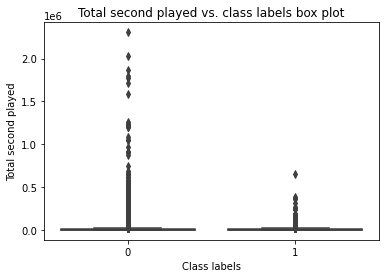

In [123]:
# boxplot
boxplot(train_logs, 'total_secs', 'Class labels', 'Total second played', 'Total second played vs. class labels box plot', col1='is_churn')

**Some small values are available, because it's day by day data. Also several outliers, so it's better to remove outliers.**

In [124]:
# getting 0th to 100th percentiles of number of unique tracks played
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_logs['total_secs'], i))

0 th percentile value is:  0.001
10 th percentile value is:  805.0
20 th percentile value is:  1541.1952
30 th percentile value is:  2366.9677999999994
40 th percentile value is:  3333.8674000000005
50 th percentile value is:  4514.544
60 th percentile value is:  6046.194199999999
70 th percentile value is:  8197.311699999998
80 th percentile value is:  11679.1312
90 th percentile value is:  19167.549700000025
100 th percentile value is:  2307918.066


**So 0 to 19167.549700000025 should be the good range, and beyond this I can set all values as nan.**

In [125]:
# setting everything to nan beyond limit(0-19167.549700000025)
train_logs['total_secs'] = train_logs['total_secs'].apply(lambda x: x if (x <= 19167.549700000025) else np.nan)

**Getting median for nan imputation.**

In [126]:
# getting median
np.nanmedian(train_logs['total_secs'])

3880.765

## Bi-variate Analysis

**Since there are only 8 features, so best way to perform bi-variate analysis is Pair plot. But here I am plotting pair plot for 7 feautes after extracting date features.**

Text(0.5, 1.01, 'Bi-variate analysis across all features')

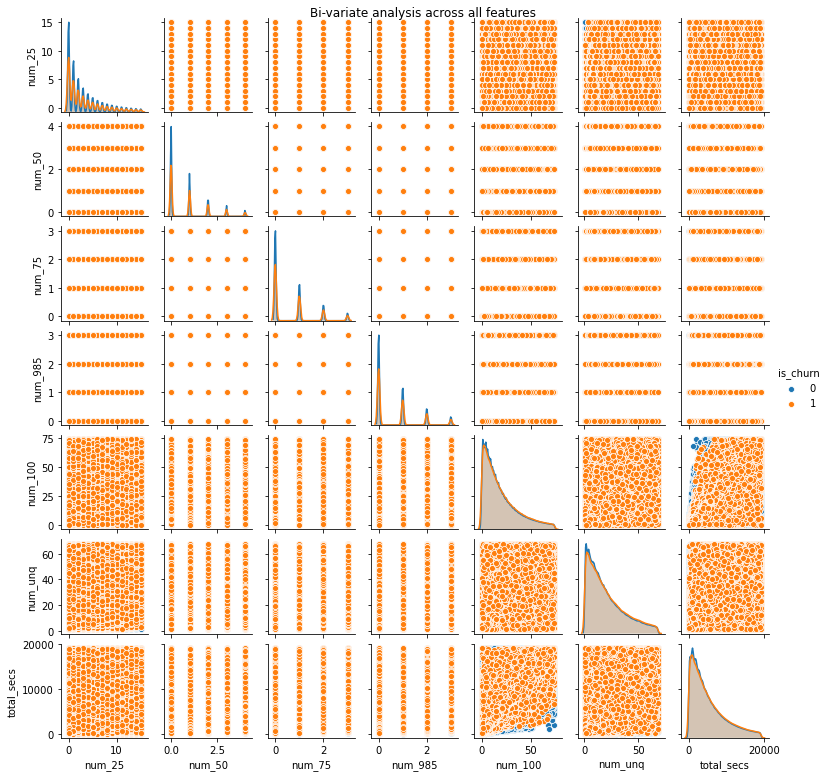

In [127]:
# pair plot
g = sns.pairplot(train_logs, vars=['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs'], height=1.5, hue='is_churn')
g.fig.suptitle('Bi-variate analysis across all features', y=1.01)

**A lot of the time there is overlap in between churn and non-churn users. But it may possible because in order to remove outliers I relaced lot of values with nan.**

##  Data Preprocessing:

### 4.1 Loading files to merge-

In [3]:
# merging members data with train data
train_members = pd.merge(train_data, members_data, on='msno', how='left')
# merging transactions data with train members data
train_mem_trans = pd.merge(train_members, transactions_data, on='msno', how='left')
# merging user logs data with train members transaction data
train_dataset = pd.merge(train_mem_trans, logs_data, on='msno', how='left')
# getting head of train dataset
pd.set_option('display.max_columns', 100)
train_dataset.head()

msno  is_churn  city    bd gender  \
0  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0   male   
1  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0   male   
2  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0   male   
3  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0   male   
4  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0   male   

   registered_via  registration_init_time  payment_method_id  \
0             3.0              20131223.0                NaN   
1             3.0              20131223.0                NaN   
2             3.0              20131223.0                NaN   
3             3.0              20131223.0                NaN   
4             3.0              20131223.0                NaN   

   payment_plan_days  plan_list_price  actual_amount_paid  is_auto_renew  \
0                NaN              NaN                 NaN            NaN   
1                NaN              NaN                 NaN            NaN   
2                NaN              NaN                 NaN            NaN   
3                NaN              NaN                 NaN            NaN   
4                NaN              NaN                 NaN            NaN   

   transaction_date  membership_expire_date  is_cancel        date  num_25  \
0               NaN                     NaN        NaN  20170305.0     7.0   
1               NaN                     NaN        NaN  20170301.0   138.0   
2               NaN                     NaN        NaN  20170319.0     0.0   
3               NaN                     NaN        NaN  20170316.0    15.0   
4               NaN                     NaN        NaN  20170310.0     0.0   

   num_50  num_75  num_985  num_100  num_unq  total_secs  
0     0.0     3.0      5.0     71.0     68.0   17599.893  
1    19.0     7.0      1.0     21.0    158.0    8830.433  
2     0.0     0.0      0.0     34.0     17.0    7883.313  
3     0.0     0.0      1.0     38.0     17.0    9029.227  
4     0.0     0.0      0.0      8.0      8.0    1870.110

In [4]:
# getting shape of train dataset
train_dataset.shape

(16887877, 23)

**So the final train dataset has over 16 million rows and 23 columns(including msno, is_churn).**

In [5]:
# since registration_init_time contains a lot of nan values so impute median date
train_dataset['registration_init_time'] = train_dataset['registration_init_time'].fillna(20150204.0)
# getting registration_init_time array
reg_date = train_dataset['registration_init_time'].values
reg_date

array([20131223., 20131223., 20131223., ..., 20110905., 20110905.,
       20150204.])

In [6]:
len(reg_date)

16887877

In [7]:
# storing these train registrationn dates to npz file
np.savez_compressed('Preprocessed Data/train_registration_date', reg_date)

### 4.2.2 For test data-

In [8]:
# merging members data with test data
test_members = pd.merge(test_data, members_data, on='msno', how='left')
# merging transactions data with test members data
test_mem_trans = pd.merge(test_members, transactions_data, on='msno', how='left')
# merging user logs data with test members transaction data
test_dataset = pd.merge(test_mem_trans, logs_data, on='msno', how='left')
# getting head of test dataset
pd.set_option('display.max_columns', 100)
test_dataset.head()

msno  is_churn  city    bd gender  \
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=         0   1.0   0.0    NaN   
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0   male   
2  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0   male   
3  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0   male   
4  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0   male   

   registered_via  registration_init_time  payment_method_id  \
0             7.0              20150718.0               41.0   
1             9.0              20051030.0               34.0   
2             9.0              20051030.0               34.0   
3             9.0              20051030.0               34.0   
4             9.0              20051030.0               34.0   

   payment_plan_days  plan_list_price  actual_amount_paid  is_auto_renew  \
0               30.0             99.0                99.0            1.0   
1               30.0            149.0               149.0            1.0   
2               30.0            149.0               149.0            1.0   
3               30.0            149.0               149.0            1.0   
4               30.0            149.0               149.0            1.0   

   transaction_date  membership_expire_date  is_cancel        date  num_25  \
0        20170318.0              20170418.0        0.0         NaN     NaN   
1        20170331.0              20170430.0        0.0  20170308.0    18.0   
2        20170331.0              20170430.0        0.0  20170319.0    21.0   
3        20170331.0              20170430.0        0.0  20170301.0    15.0   
4        20170331.0              20170430.0        0.0  20170307.0     3.0   

   num_50  num_75  num_985  num_100  num_unq  total_secs  
0     NaN     NaN      NaN      NaN      NaN         NaN  
1     4.0     7.0      5.0    117.0    129.0   32699.940  
2     2.0     3.0      4.0     34.0     57.0   10333.911  
3     2.0     6.0      6.0    112.0    120.0   30488.489  
4     2.0     0.0      1.0     13.0     16.0    3826.011

In [9]:
# getting shape of the test dataset
test_dataset.shape

(13745932, 23)

**Test dataset is also fairly large, which contain more than 13 million rows with 23 columns(including msno and is_churn).**

In [10]:
# since registration_init_time contains a lot of nan values so impute median date
test_dataset['registration_init_time'] = test_dataset['registration_init_time'].fillna(20150204.0)
# getting registration_init_time array
reg_date = test_dataset['registration_init_time'].values
reg_date

array([20150718., 20051030., 20051030., ..., 20130820., 20130820.,
       20130820.])

In [11]:
len(reg_date)

13745932

In [12]:
# storing these test registration dates to npz file
np.savez_compressed('Preprocessed Data/test_registration_date', reg_date)

### 4.3 Preprocessing-

In [13]:
def preprocess(data):
    '''This preprocess function is used to perform basic preprocessing on top of train and test dataset
    These preprocessing consist outliers removal, nan imputation and replacing the values'''
    
    # imputing 0 in place of nan values in the city column
    data['city'] = data['city'].fillna(0)
    # removing outliers
    data['bd'] = data['bd'].apply(lambda x: x if (x < 72.0) and (x > 0.0) else np.nan)
    # imputing 28 as age instead of nan
    data['bd'] = data['bd'].fillna(28.0)
    # replacing male with 1 in gender
    data['gender'] = data['gender'].replace(to_replace='male', value=1)
    # replacing male with 2 in gender
    data['gender'] = data['gender'].replace(to_replace='female', value=2)
    # replacing nan with 0 in gender
    data['gender'] = data['gender'].fillna(0)
    # replace 0 instead of nan in registered_via
    data['registered_via'] = data['registered_via'].fillna(0)

    # filling median date in place of nan in the df
    data['registration_init_time'] = data['registration_init_time'].fillna(20150204.0)
    # converting float date to datetime
    data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], format='%Y%m%d')

    # imputing 0 in place of nan value in payment_method_id
    data['payment_method_id'] = data['payment_method_id'].fillna(0)

    # removing outliers
    data['payment_plan_days'] = data['payment_plan_days'].apply(lambda x: x if (x <= 30.0) else np.nan)
    # imputing 30 in place of nan in payment_plan_days
    data['payment_plan_days'] = data['payment_plan_days'].fillna(30.0)
    # removing outliers
    data['plan_list_price'] = data['plan_list_price'].apply(lambda x: x if (x <= 180.0) else np.nan)
    # imputing 149 in place of nan in plan_list_price
    data['plan_list_price'] = data['plan_list_price'].fillna(149.0)
    # removing outliers
    data['actual_amount_paid'] = data['actual_amount_paid'].apply(lambda x: x if (x <= 180.0) else np.nan)
    # imputing 149 in place of nan in actual_amount_paid
    data['actual_amount_paid'] = data['actual_amount_paid'].fillna(149.0)
    # imputing 2 in place of nan values in is_auto_renew
    data['is_auto_renew'] = data['is_auto_renew'].fillna(2)

    # filling median date in place of nan in the df
    data['transaction_date'] = data['transaction_date'].fillna(20170316.0)
    # converting float date to datetime
    data['transaction_date'] = pd.to_datetime(data['transaction_date'], format='%Y%m%d')

    # filling median date in place of nan in the df
    data['membership_expire_date'] = data['membership_expire_date'].fillna(20170419.0)
    # converting float date to datetime
    data['membership_expire_date'] = pd.to_datetime(data['membership_expire_date'], format='%Y%m%d')

    # imputing 2 in place of nan values in is_cancel
    data['is_cancel'] = data['is_cancel'].fillna(2)

    # filling median date in place of nan in the df
    data['date'] = data['date'].fillna(20170316.0)
    # converting float date to datetime
    data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

    # removing outliers
    data['num_25'] = data['num_25'].apply(lambda x: x if (x <= 15.0) else np.nan)
    # now I can impute 2 instead of nan in num_25
    data['num_25'] = data['num_25'].fillna(2.0)

    # removing outliers
    data['num_50'] = data['num_50'].apply(lambda x: x if (x <= 4.0) else np.nan)
    # now I can impute 0 instead of nan in num_50
    data['num_50'] = data['num_50'].fillna(0)

    # removing outliers
    data['num_75'] = data['num_75'].apply(lambda x: x if (x <= 3.0) else np.nan)
    # now I can impute 0 instead of nan in num_75
    data['num_75'] = data['num_75'].fillna(0)
    # removing outliers
    data['num_100'] = data['num_100'].apply(lambda x: x if (x <= 74.0) else np.nan)
    # now I can impute 14 instead of nan in num_100
    data['num_100'] = data['num_100'].fillna(14.0)
    # removing outliers
    data['num_unq'] = data['num_unq'].apply(lambda x: x if (x <= 68.0) else np.nan)
    # now I can impute 16 instead of nan in num_unq
    data['num_unq'] = data['num_unq'].fillna(16.0)
    # removing outliers
    data['total_secs'] = data['total_secs'].apply(lambda x: x if (x <= 19167.549700000025) else np.nan)
    # now I can impute 3880.765 instead of nan in total_secs
    data['total_secs'] = data['total_secs'].fillna(3880.765)

### 4.3.1 For train data-

In [14]:
# Checking null values for train data
# getting features wise null values (number)
train_dataset.isnull().sum()

msno                            0
is_churn                        0
city                       117166
bd                         117166
gender                    7860346
registered_via             117166
registration_init_time          0
payment_method_id          340641
payment_plan_days          340641
plan_list_price            340641
actual_amount_paid         340641
is_auto_renew              340641
transaction_date           340641
membership_expire_date     340641
is_cancel                  340641
date                       249615
num_25                     249615
num_50                     249615
num_75                     249615
num_985                    249615
num_100                    249615
num_unq                    249615
total_secs                 249615
dtype: int64

In [15]:
# performing preprocessing on top of entire train data
preprocess(train_dataset)

In [16]:
# again just to cross check if there is any null or not
train_dataset.isnull().values.any()

False

In [17]:
# checking for any duplicate row
train_dataset.duplicated().any()

False

**So there are no null values and no duplicates remaining, now I can store this dataframe as train dataframe.**

In [18]:
# saving train file to disk
train_dataset.to_csv('"C:\Users\Tim\Downloads\PA-Project\processedtrain.csv"', index=False)

###  For test data-

In [19]:
# Checking null values for test data
# getting features wise null values (number)
test_dataset.isnull().sum()

msno                            0
is_churn                        0
city                       114011
bd                         114011
gender                    7436258
registered_via             114011
registration_init_time          0
payment_method_id              10
payment_plan_days              10
plan_list_price                10
actual_amount_paid             10
is_auto_renew                  10
transaction_date               10
membership_expire_date         10
is_cancel                      10
date                       212724
num_25                     212724
num_50                     212724
num_75                     212724
num_985                    212724
num_100                    212724
num_unq                    212724
total_secs                 212724
dtype: int64

In [20]:
# performing preprocessing on top of entire test data
preprocess(test_dataset)

In [21]:
# again just to cross check if there is any null or not
test_dataset.isnull().values.any()

False

In [22]:
# checking for any duplicate row
test_dataset.duplicated().any()

False

**So there are no null values and no duplicates remaining, now I can store this dataframe as train dataframe.**

In [23]:
# saving test file to disk
test_dataset.to_csv('Preprocessed Data/test.csv', index=False)

# Feature Engineering for KKBox Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the files

train_dataset = pd.read_csv(r"C:\Users\Tim\Downloads\PA-Project\preprocesedtrain.csv")
test_dataset = pd.read_csv(r"C:\Users\Tim\Downloads\PA-Project\preprocesedtest.csv")

In [3]:
# getting head of train file
pd.set_option('display.max_columns', 100)
train_dataset.head()

msno  is_churn  city    bd  gender  \
0  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0     1.0   
1  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0     1.0   
2  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0     1.0   
3  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0     1.0   
4  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0     1.0   

   registered_via registration_init_time  payment_method_id  \
0             3.0             2013-12-23                0.0   
1             3.0             2013-12-23                0.0   
2             3.0             2013-12-23                0.0   
3             3.0             2013-12-23                0.0   
4             3.0             2013-12-23                0.0   

   payment_plan_days  plan_list_price  actual_amount_paid  is_auto_renew  \
0               30.0            149.0               149.0            2.0   
1               30.0            149.0               149.0            2.0   
2               30.0            149.0               149.0            2.0   
3               30.0            149.0               149.0            2.0   
4               30.0            149.0               149.0            2.0   

  transaction_date membership_expire_date  is_cancel        date  num_25  \
0       2017-03-16             2017-04-19        2.0  2017-03-05     7.0   
1       2017-03-16             2017-04-19        2.0  2017-03-01     2.0   
2       2017-03-16             2017-04-19        2.0  2017-03-19     0.0   
3       2017-03-16             2017-04-19        2.0  2017-03-16    15.0   
4       2017-03-16             2017-04-19        2.0  2017-03-10     0.0   

   num_50  num_75  num_985  num_100  num_unq  total_secs  
0     0.0     3.0      0.0     71.0     68.0   17599.893  
1     0.0     0.0      1.0     21.0     16.0    8830.433  
2     0.0     0.0      0.0     34.0     17.0    7883.313  
3     0.0     0.0      1.0     38.0     17.0    9029.227  
4     0.0     0.0      0.0      8.0      8.0    1870.110

In [4]:
# getting head of test file
pd.set_option('display.max_columns', 100)
test_dataset.head()

msno  is_churn  city    bd  gender  \
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=         0   1.0  28.0     0.0   
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0     1.0   
2  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0     1.0   
3  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0     1.0   
4  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0     1.0   

   registered_via registration_init_time  payment_method_id  \
0             7.0             2015-07-18               41.0   
1             9.0             2005-10-30               34.0   
2             9.0             2005-10-30               34.0   
3             9.0             2005-10-30               34.0   
4             9.0             2005-10-30               34.0   

   payment_plan_days  plan_list_price  actual_amount_paid  is_auto_renew  \
0               30.0             99.0                99.0            1.0   
1               30.0            149.0               149.0            1.0   
2               30.0            149.0               149.0            1.0   
3               30.0            149.0               149.0            1.0   
4               30.0            149.0               149.0            1.0   

  transaction_date membership_expire_date  is_cancel        date  num_25  \
0       2017-03-18             2017-04-18        0.0  2017-03-16     2.0   
1       2017-03-31             2017-04-30        0.0  2017-03-08     2.0   
2       2017-03-31             2017-04-30        0.0  2017-03-19     2.0   
3       2017-03-31             2017-04-30        0.0  2017-03-01    15.0   
4       2017-03-31             2017-04-30        0.0  2017-03-07     3.0   

   num_50  num_75  num_985  num_100  num_unq  total_secs  
0     0.0     0.0      0.0     14.0     16.0    3880.765  
1     4.0     0.0      0.0     14.0     16.0    3880.765  
2     2.0     3.0      0.0     34.0     57.0   10333.911  
3     2.0     0.0      0.0     14.0     16.0    3880.765  
4     2.0     0.0      1.0     13.0     16.0    3826.011

In [5]:
# Feature - 1 (getting weekday from date)
# getting weekday from the date feature for train data
train_dataset['date'] = pd.to_datetime(train_dataset['date'], errors='coerce')
train_dataset['day_of_the_week'] = train_dataset['date'].dt.day_name().values

# getting weekday from the date feature for test data
test_dataset['date'] = pd.to_datetime(test_dataset['date'], errors='coerce')
test_dataset['day_of_the_week'] = test_dataset['date'].dt.day_name().values

In [6]:
# Feature - 2 (checking for the weekend)

train_dataset['is_weekend'] = train_dataset['day_of_the_week'].apply(lambda x: 1 if (x == 'Saturday') or (x == 'Sunday') else 0)
test_dataset['is_weekend'] = test_dataset['day_of_the_week'].apply(lambda x: 1 if (x == 'Saturday') or (x == 'Sunday') else 0)

In [7]:
# Feature - 3 (checking for the weekday)

train_dataset['is_weekday'] = train_dataset['is_weekend'].apply(lambda x: 1 if (x == 0) else 0)
test_dataset['is_weekday'] = test_dataset['is_weekend'].apply(lambda x: 1 if (x == 0) else 0)

In [8]:
%%time
# Feature - (sum based features)
# Feature -  (mean based features)
# Feature - (standard deviation based features)
# Feature - (nunique based feature)
# Feature -  (min and max based features)
# Feature -  (mean based features for transaction)
# Feature - (transaction count)
# Feature -  (transaction date max)
# Feature -  (membership expiry date max)
# Feature -  (membership expiry date count)

def std(x):
    '''finding standard deviation using numpy,
    to avoid getting nan values'''
    return np.std(x)

# grouping them together for train data
temp_df_train = train_dataset.groupby('msno').agg(num_25_sum=('num_25', 'sum'),
                                num_50_sum=('num_50', 'sum'),
                                num_75_sum=('num_75', 'sum'),
                                num_985_sum=('num_985', 'sum'),
                                num_100_sum=('num_100', 'sum'),
                                num_unq_sum=('num_unq', 'sum'),
                                total_secs_sum=('total_secs', 'sum'),
                                is_weekend_sum=('is_weekend', 'sum'),
                                is_weekday_sum=('is_weekday', 'sum'),
                                num_25_mean=('num_25', 'mean'),
                                num_50_mean=('num_50', 'mean'),
                                num_75_mean=('num_75', 'mean'),
                                num_985_mean=('num_985', 'mean'),
                                num_100_mean=('num_100', 'mean'),
                                num_unq_mean=('num_unq', 'mean'),
                                total_secs_mean=('total_secs', 'mean'),
                                num_25_std=('num_25', std),
                                num_50_std=('num_50', std),
                                num_75_std=('num_75', std),
                                num_985_std=('num_985', std),
                                num_100_std=('num_100', std),
                                num_unq_std=('num_unq', std),
                                total_secs_std=('total_secs', std),
                                active_days=('date', 'nunique'),
                                date_min=('date', 'min'),
                                date_max=('date', 'max'),
                                payment_plan_days_mean=('payment_plan_days', 'mean'),
                                plan_list_price_mean=('plan_list_price', 'mean'),
                                actual_amount_paid_mean=('actual_amount_paid', 'mean'),
                                transaction_date_count=('transaction_date', 'nunique'),
                                transaction_date_max=('transaction_date', 'max'),
                                membership_expire_date_max=('membership_expire_date', 'max'),
                                membership_expire_count=('membership_expire_date', 'nunique'))
# merging them with the train dataset
train_dataset = pd.merge(train_dataset, temp_df_train, on='msno', how='left')

# grouping them together for test data
temp_df_test = test_dataset.groupby('msno').agg(num_25_sum=('num_25', 'sum'),
                                num_50_sum=('num_50', 'sum'),
                                num_75_sum=('num_75', 'sum'),
                                num_985_sum=('num_985', 'sum'),
                                num_100_sum=('num_100', 'sum'),
                                num_unq_sum=('num_unq', 'sum'),
                                total_secs_sum=('total_secs', 'sum'),
                                is_weekend_sum=('is_weekend', 'sum'),
                                is_weekday_sum=('is_weekday', 'sum'),
                                num_25_mean=('num_25', 'mean'),
                                num_50_mean=('num_50', 'mean'),
                                num_75_mean=('num_75', 'mean'),
                                num_985_mean=('num_985', 'mean'),
                                num_100_mean=('num_100', 'mean'),
                                num_unq_mean=('num_unq', 'mean'),
                                total_secs_mean=('total_secs', 'mean'),
                                num_25_std=('num_25', std),
                                num_50_std=('num_50', std),
                                num_75_std=('num_75', std),
                                num_985_std=('num_985', std),
                                num_100_std=('num_100', std),
                                num_unq_std=('num_unq', std),
                                total_secs_std=('total_secs', std),
                                active_days=('date', 'nunique'),
                                date_min=('date', 'min'),
                                date_max=('date', 'max'),
                                payment_plan_days_mean=('payment_plan_days', 'mean'),
                                plan_list_price_mean=('plan_list_price', 'mean'),
                                actual_amount_paid_mean=('actual_amount_paid', 'mean'),
                                transaction_date_count=('transaction_date', 'nunique'),
                                transaction_date_max=('transaction_date', 'max'),
                                membership_expire_date_max=('membership_expire_date', 'max'),
                                membership_expire_count=('membership_expire_date', 'nunique'))
# merging them with the test dataset
test_dataset = pd.merge(test_dataset, temp_df_test, on='msno', how='left')

CPU times: user 10min 47s, sys: 26.2 s, total: 11min 13s
Wall time: 11min 4s


In [9]:
# Feature - (activity period)
train_dataset['date_min'] = pd.to_datetime(train_dataset['date_min'], errors='coerce')
train_dataset['date_max'] = pd.to_datetime(train_dataset['date_max'], errors='coerce')
test_dataset['date_min'] = pd.to_datetime(test_dataset['date_min'], errors='coerce')
test_dataset['date_max'] = pd.to_datetime(test_dataset['date_max'], errors='coerce')
train_dataset['activity_period'] = (train_dataset['date_max'] - train_dataset['date_min']).dt.days + 1
test_dataset['activity_period'] = (test_dataset['date_max'] - test_dataset['date_min']).dt.days + 1

In [10]:
# Feature -  (inactive days)

train_dataset['inactive_days'] = train_dataset['date'].nunique() - train_dataset['active_days']
test_dataset['inactive_days'] = test_dataset['date'].nunique() - test_dataset['active_days']

In [11]:
# Feature - (rare behaviour)
# 0 (for not rare user) and 1 (for rare user)

train_dataset['is_rare'] = train_dataset['active_days'].apply(lambda x: 0 if (x > 1) else 1)
test_dataset['is_rare'] = test_dataset['active_days'].apply(lambda x: 0 if (x > 1) else 1)

In [12]:
# Feature -  (average time per day)

train_dataset['avg_time_perday'] = train_dataset['total_secs_sum'] / train_dataset['active_days']
test_dataset['avg_time_perday'] = test_dataset['total_secs_sum'] / test_dataset['active_days']
# Feature -  (unique tracks played per day)
train_dataset['unq_track_perday'] = round(train_dataset['num_unq_sum'] / train_dataset['active_days'])
test_dataset['unq_track_perday'] = round(test_dataset['num_unq_sum'] / test_dataset['active_days'])
# Feature -  (tracks played till 25% length per day)
train_dataset['till_25_perday'] = round(train_dataset['num_25_sum'] / train_dataset['active_days'])
test_dataset['till_25_perday'] = round(test_dataset['num_25_sum'] / test_dataset['active_days'])


# Feature - (tracks played till 50% length per day)

train_dataset['till_50_perday'] = round(train_dataset['num_50_sum'] / train_dataset['active_days'])
test_dataset['till_50_perday'] = round(test_dataset['num_50_sum'] / test_dataset['active_days'])

# Feature -  (tracks played till 100% length per day)

train_dataset['till_full_perday'] = round(train_dataset['num_100_sum'] / train_dataset['active_days'])
test_dataset['till_full_perday'] = round(test_dataset['num_100_sum'] / test_dataset['active_days'])

In [13]:
# Feature -  (discount)

train_dataset['discount'] = train_dataset['plan_list_price'] - train_dataset['actual_amount_paid']
test_dataset['discount'] = test_dataset['plan_list_price'] - test_dataset['actual_amount_paid']

In [14]:
train_dataset['discount'].unique()

array([   0.,  149.,  180., -149.,   30., -119., -129.,  120.,   20.,
         50., -100.,   -1.,   99.,  129.,    1.])

In [15]:

train_dataset['discount'] = train_dataset['discount'].clip(lower=0)
test_dataset['discount'] = test_dataset['discount'].clip(lower=0)

In [16]:
# Feature -  (is_discount)

train_dataset['is_discount'] = train_dataset['discount'].apply(lambda x: 1 if (x > 0) else 0)
test_dataset['is_discount'] = test_dataset['discount'].apply(lambda x: 1 if (x > 0) else 0)

In [17]:
# Feature -  (days since final login)
# Threshold that is set here is the last date of data, which is 31-03-2017

train_dataset['days_since_last_login'] = (pd.to_datetime(train_dataset['date'].unique().max(), errors='coerce') - train_dataset['date_max']).dt.days
test_dataset['days_since_last_login'] = (pd.to_datetime(test_dataset['date'].unique().max(), errors='coerce') - test_dataset['date_max']).dt.days

In [18]:
train_dataset['membership_expire_date_max'] = pd.to_datetime(train_dataset['membership_expire_date_max'], errors='coerce')
test_dataset['membership_expire_date_max'] = pd.to_datetime(test_dataset['membership_expire_date_max'], errors='coerce')

train_dataset['days_left'] = (train_dataset['membership_expire_date_max'] - pd.to_datetime(train_dataset['date'].unique().max(), errors='coerce')).dt.days
test_dataset['days_left'] = (test_dataset['membership_expire_date_max'] - pd.to_datetime(test_dataset['date'].unique().max(), errors='coerce')).dt.days 

In [19]:
train_dataset['days_left'] = train_dataset['days_left'].clip(lower=0)
test_dataset['days_left'] = test_dataset['days_left'].clip(lower=0)

In [20]:
# Feature -  (Loyality range)

train_dataset['transaction_date_max'] = pd.to_datetime(train_dataset['transaction_date_max'], errors='coerce')
test_dataset['transaction_date_max'] = pd.to_datetime(test_dataset['transaction_date_max'], errors='coerce')
train_dataset['registration_init_time'] = pd.to_datetime(train_dataset['registration_init_time'], errors='coerce')
test_dataset['registration_init_time'] = pd.to_datetime(test_dataset['registration_init_time'], errors='coerce')

train_dataset['layality_range'] = (train_dataset['transaction_date_max'] - train_dataset['registration_init_time']).dt.days
test_dataset['layality_range'] = (test_dataset['transaction_date_max'] - test_dataset['registration_init_time']).dt.days

In [22]:
# Feature -  (days since final transaction)

train_dataset['days_since_final_transaction'] = (pd.to_datetime(train_dataset['date'].unique().max(), errors='coerce') - train_dataset['transaction_date_max']).dt.days
test_dataset['days_since_final_transaction'] = (pd.to_datetime(test_dataset['date'].unique().max(), errors='coerce') - test_dataset['transaction_date_max']).dt.days

In [23]:
# all features in train data
train_dataset.columns

Index(['msno', 'is_churn', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'payment_method_id', 'payment_plan_days',
       'plan_list_price', 'actual_amount_paid', 'is_auto_renew',
       'transaction_date', 'membership_expire_date', 'is_cancel', 'date',
       'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs', 'day_of_the_week', 'is_weekend', 'is_weekday',
       'num_25_sum', 'num_50_sum', 'num_75_sum', 'num_985_sum', 'num_100_sum',
       'num_unq_sum', 'total_secs_sum', 'is_weekend_sum', 'is_weekday_sum',
       'num_25_mean', 'num_50_mean', 'num_75_mean', 'num_985_mean',
       'num_100_mean', 'num_unq_mean', 'total_secs_mean', 'num_25_std',
       'num_50_std', 'num_75_std', 'num_985_std', 'num_100_std', 'num_unq_std',
       'total_secs_std', 'active_days', 'date_min', 'date_max',
       'payment_plan_days_mean', 'plan_list_price_mean',
       'actual_amount_paid_mean', 'transaction_date_count',
       'transaction_dat

**Since data is very large so storing them by changing the default datatype to custom datatype can reduce the size of new csv files.**

In [24]:
def datatype_changer(dataset):
    # iterating through all the columns in the dataframe
    for col in dataset.columns:
        # getting column's datatype
        col_type = dataset[col].dtype
        
        # checking if datatype of column is 'object' or not
        # if column type is not object
        if (col_type == int) or (col_type == float):
            # getting minimum value of a column
            min_val = dataset[col].min()
            # getting maximum value of a column
            max_val = dataset[col].max()
            # checking whether the datatype contain first 3 characters as int or not, if int
            if str(col_type)[:3] == 'int':
                # cheking the minimal and maximal value for int8, int16, int32 and int64 in numpy
                if min_val > np.iinfo(np.int8).min and max_val < np.iinfo(np.int8).max:
                    dataset[col] = dataset[col].astype(np.int8)
                elif min_val > np.iinfo(np.int16).min and max_val < np.iinfo(np.int16).max:
                    dataset[col] = dataset[col].astype(np.int16)
                elif min_val > np.iinfo(np.int32).min and max_val < np.iinfo(np.int32).max:
                    dataset[col] = dataset[col].astype(np.int32)
                else:
                    dataset[col] = dataset[col].astype(np.int64)
            else:
                # if it is non int, which is ultimately float
                # cheking the minimal and maximal value for float16, float32 and float64 in numpy
                if min_val > np.finfo(np.float16).min and max_val < np.finfo(np.float16).max:
                    dataset[col] = dataset[col].astype(np.float16)
                elif min_val > np.finfo(np.float32).min and max_val < np.finfo(np.float32).max:
                    dataset[col] = dataset[col].astype(np.float32)
                else:
                    dataset[col] = dataset[col].astype(np.float64)
        else:
            # keeping rest of them to category datatype instead of object
            dataset[col] = dataset[col].astype('category')
            
    # returning head of the dataframe
    return dataset

In [25]:
train_dataset = datatype_changer(train_dataset)

In [26]:
test_dataset = datatype_changer(test_dataset)

In [1]:
from sklearn.model_selection import train_test_split

##  Data preparation for train set-

In [2]:
# loading train dataset
train_dataset = pd.read_csv("C:\Users\Tim\Downloads\PA-Project\train.csv")
# setting max_columns to 100, so it displays all the columns of train dataset
pd.set_option('display.max_columns', 100)
# displaying head (top 5) rows of train dataset
train_dataset.head()

msno  is_churn  city    bd  gender  \
0  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0     1.0   
1  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0     1.0   
2  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0     1.0   
3  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0     1.0   
4  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0     1.0   

   registered_via  registration_init_time  payment_method_id  \
0             3.0     1387756800000000000                0.0   
1             3.0     1387756800000000000                0.0   
2             3.0     1387756800000000000                0.0   
3             3.0     1387756800000000000                0.0   
4             3.0     1387756800000000000                0.0   

   payment_plan_days  plan_list_price  actual_amount_paid  is_auto_renew  \
0               30.0            149.0               149.0            2.0   
1               30.0            149.0               149.0            2.0   
2               30.0            149.0               149.0            2.0   
3               30.0            149.0               149.0            2.0   
4               30.0            149.0               149.0            2.0   

  transaction_date membership_expire_date  is_cancel                 date  \
0       2017-03-16             2017-04-19        2.0  1488672000000000000   
1       2017-03-16             2017-04-19        2.0  1488326400000000000   
2       2017-03-16             2017-04-19        2.0  1489881600000000000   
3       2017-03-16             2017-04-19        2.0  1489622400000000000   
4       2017-03-16             2017-04-19        2.0  1489104000000000000   

   num_25  num_50  num_75  num_985  num_100  num_unq  total_secs  \
0     7.0     0.0     3.0      0.0     71.0     68.0     17600.0   
1     2.0     0.0     0.0      1.0     21.0     16.0      8830.0   
2     0.0     0.0     0.0      0.0     34.0     17.0      7884.0   
3    15.0     0.0     0.0      1.0     38.0     17.0      9030.0   
4     0.0     0.0     0.0      0.0      8.0      8.0      1870.0   

  day_of_the_week  is_weekend  is_weekday  num_25_sum  num_50_sum  num_75_sum  \
0          Sunday           1           0        50.0         4.0         6.0   
1       Wednesday           0           1        50.0         4.0         6.0   
2          Sunday           1           0        50.0         4.0         6.0   
3        Thursday           0           1        50.0         4.0         6.0   
4          Friday           0           1        50.0         4.0         6.0   

   num_985_sum  num_100_sum  num_unq_sum  total_secs_sum  is_weekend_sum  \
0          5.0        246.0        206.0       64499.977               5   
1          5.0        246.0        206.0       64499.977               5   
2          5.0        246.0        206.0       64499.977               5   
3          5.0        246.0        206.0       64499.977               5   
4          5.0        246.0        206.0       64499.977               5   

   is_weekday_sum  num_25_mean  num_50_mean  num_75_mean  num_985_mean  \
0               6        4.547       0.3635       0.5454        0.4546   
1               6        4.547       0.3635       0.5454        0.4546   
2               6        4.547       0.3635       0.5454        0.4546   
3               6        4.547       0.3635       0.5454        0.4546   
4               6        4.547       0.3635       0.5454        0.4546   

   num_100_mean  num_unq_mean  total_secs_mean  num_25_std  num_50_std  \
0         22.36         18.73           5864.0       4.734       0.481   
1         22.36         18.73           5864.0       4.734       0.481   
2         22.36         18.73           5864.0       4.734       0.481   
3         22.36         18.73           5864.0       4.734       0.481   
4         22.36         18.73           5864.0       4.734       0.481   

   num_7

In [3]:
# removing all non_useful features first
train_dataset = train_dataset.drop(['registration_init_time',
                              'transaction_date', 
                              'membership_expire_date', 
                              'date', 
                              'num_25',
                              'num_50',
                              'num_75',
                              'num_985',
                              'num_100',
                              'num_unq',
                              'total_secs',
                              'is_weekend',
                              'is_weekday',
                              'day_of_the_week', 
                              'date_min', 
                              'date_max', 
                              'transaction_date_max', 
                              'membership_expire_date_max'], axis=1, inplace=False)

In [4]:
# getting shape of train dataset
train_dataset.shape

(16887877, 58)

**Now this train dataset has 16887877 rows and 58 columns.**

In [5]:
# adding registration init time feature to train dataset
# load the registration array
reg_date = np.load('Preprocessed Data/train_registration_date.npz')
# display the array
reg_date['arr_0']

array([20131223., 20131223., 20131223., ..., 20110905., 20110905.,
       20150204.])

In [6]:
# converting numpy array to list
registration_init_time = reg_date['arr_0'].tolist()
# getting length of the list
len(registration_init_time)

16887877

In [7]:
# creating new feature, and adding it to train dataset
train_dataset['registration_init_time'] = registration_init_time

In [8]:
# setting max_columns to 100, so it displays all the columns of train dataset
pd.set_option('display.max_columns', 100)
# displaying head (top 5) rows of train dataset
train_dataset.head()

msno  is_churn  city    bd  gender  \
0  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0     1.0   
1  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0     1.0   
2  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0     1.0   
3  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0     1.0   
4  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0     1.0   

   registered_via  payment_method_id  payment_plan_days  plan_list_price  \
0             3.0                0.0               30.0            149.0   
1             3.0                0.0               30.0            149.0   
2             3.0                0.0               30.0            149.0   
3             3.0                0.0               30.0            149.0   
4             3.0                0.0               30.0            149.0   

   actual_amount_paid  is_auto_renew  is_cancel  num_25_sum  num_50_sum  \
0               149.0            2.0        2.0        50.0         4.0   
1               149.0            2.0        2.0        50.0         4.0   
2               149.0            2.0        2.0        50.0         4.0   
3               149.0            2.0        2.0        50.0         4.0   
4               149.0            2.0        2.0        50.0         4.0   

   num_75_sum  num_985_sum  num_100_sum  num_unq_sum  total_secs_sum  \
0         6.0          5.0        246.0        206.0       64499.977   
1         6.0          5.0        246.0        206.0       64499.977   
2         6.0          5.0        246.0        206.0       64499.977   
3         6.0          5.0        246.0        206.0       64499.977   
4         6.0          5.0        246.0        206.0       64499.977   

   is_weekend_sum  is_weekday_sum  num_25_mean  num_50_mean  num_75_mean  \
0               5               6        4.547       0.3635       0.5454   
1               5               6        4.547       0.3635       0.5454   
2               5               6        4.547       0.3635       0.5454   
3               5               6        4.547       0.3635       0.5454   
4               5               6        4.547       0.3635       0.5454   

   num_985_mean  num_100_mean  num_unq_mean  total_secs_mean  num_25_std  \
0        0.4546         22.36         18.73           5864.0       4.734   
1        0.4546         22.36         18.73           5864.0       4.734   
2        0.4546         22.36         18.73           5864.0       4.734   
3        0.4546         22.36         18.73           5864.0       4.734   
4        0.4546         22.36         18.73           5864.0       4.734   

   num_50_std  num_75_std  num_985_std  num_100_std  num_unq_std  \
0       0.481      0.8906       0.8906        19.42        16.14   
1       0.481      0.8906       0.8906        19.42        16.14   
2       0.481      0.8906       0.8906        19.42        16.14   
3       0.481      0.8906       0.8906        19.42        16.14   
4       0.481      0.8906       0.8906        19.42        16.14   

   total_secs_std  active_days  payment_plan_days_mean  plan_list_price_mean  \
0          4748.0           11                    30.0                 149.0   
1          4748.0           11                    30.0                 149.0   
2          4748.0           11                    30.0                 149.0   
3          4748.0           11                    30.0                 149.0   
4          4748.0           11                    30.0                 149.0   

   actual_amount_paid_mean  transaction_date_count  membership_expire_count  \
0                    149.0                       1                        1   
1                    149.0                       1                        1   
2                    149.0                       1                        1   
3                    149.0                       1                        1   
4               

In [2]:
# reading csv file for removing duplicates
train_dataset = pd.read_csv('Prepare Data/prepared_train.csv')
train_dataset.columns

Index(['msno', 'is_churn', 'city', 'bd', 'gender', 'registered_via',
       'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'is_cancel', 'num_25_sum',
       'num_50_sum', 'num_75_sum', 'num_985_sum', 'num_100_sum', 'num_unq_sum',
       'total_secs_sum', 'is_weekend_sum', 'is_weekday_sum', 'num_25_mean',
       'num_50_mean', 'num_75_mean', 'num_985_mean', 'num_100_mean',
       'num_unq_mean', 'total_secs_mean', 'num_25_std', 'num_50_std',
       'num_75_std', 'num_985_std', 'num_100_std', 'num_unq_std',
       'total_secs_std', 'active_days', 'payment_plan_days_mean',
       'plan_list_price_mean', 'actual_amount_paid_mean',
       'transaction_date_count', 'membership_expire_count', 'activity_period',
       'inactive_days', 'is_rare', 'avg_time_perday', 'unq_track_perday',
       'till_25_perday', 'till_50_perday', 'till_75_perday', 'till_985_perday',
       'till_full_perday', 'discount', 'is_discount', 'days_since_last_l

In [3]:
# removing all duplicate rows for a particular id
train_dataset = train_dataset.drop_duplicates('msno', keep='first', inplace=False)
# setting max_columns to 100, so it displays all the columns of train dataset
pd.set_option('display.max_columns', 100)
# displaying head (top 10) rows of train dataset
train_dataset.head(10)

msno  is_churn  city    bd  \
0    ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0   
11   f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=         1  13.0  20.0   
17   zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=         1  13.0  18.0   
57   8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=         1   1.0  28.0   
67   K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=         1  13.0  35.0   
187  ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=         1  22.0  28.0   
191  kVmM8X4iBPCOfK/m1l3KR7LjFoxD1EcKYCc76F5IAWw=         1   1.0  28.0   
192  moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=         1   9.0  28.0   
223  dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=         1  13.0  21.0   
281  otEcMhAX3mU4gumUSogqgteN3oaNmhdmTkoof2iRYEE=         1  13.0  28.0   

     gender  registered_via  payment_method_id  payment_plan_days  \
0       1.0             3.0                0.0               30.0   
11      1.0             3.0               36.0               30.0   
17      1.0             3.0               17.0               30.0   
57      0.0             7.0               41.0               30.0   
67      2.0             7.0               41.0               30.0   
187     0.0             3.0               40.0               30.0   
191     0.0             7.0               41.0               30.0   
192     2.0             3.0               38.0               30.0   
223     2.0             9.0               38.0               30.0   
281     0.0             7.0               40.0               30.0   

     plan_list_price  actual_amount_paid  is_auto_renew  is_cancel  \
0              149.0               149.0            2.0        2.0   
11             180.0               180.0            0.0        0.0   
17               0.0                 0.0            0.0        0.0   
57             149.0               149.0            1.0        0.0   
67              99.0                99.0            1.0        0.0   
187            149.0               149.0            1.0        1.0   
191             99.0                99.0            1.0        1.0   
192            149.0               149.0            0.0        0.0   
223            149.0               149.0            0.0        0.0   
281            149.0               149.0            1.0        0.0   

     num_25_sum  num_50_sum  num_75_sum  num_985_sum  num_100_sum  \
0          50.0         4.0         6.0          5.0        246.0   
11          0.0         4.0         2.0          0.0         26.0   
17        150.0        50.0        38.0         30.0        410.0   
57         20.0         0.0         0.0          0.0        140.0   
67         72.0        56.0        32.0         32.0       3928.0   
187         6.0         1.0         1.0          4.0         37.0   
191         2.0         0.0         0.0          0.0         14.0   
192        78.0        20.0        25.0         16.0        812.0   
223       244.0        46.0        36.0         22.0       1186.0   
281       148.0        28.0        22.0         32.0        730.0   

     num_unq_sum  total_secs_sum  is_weekend_sum  is_weekday_sum  num_25_mean  \
0          206.0       64499.977               5               6        4.547   
11          30.0        6986.509               3               3        0.000   
17         732.0      135620.940              16              24        3.750   
57         160.0       38807.650               0              10        2.000   
67        4384.0      992830.000              24              96        0.600   
187         48.0       10110.665               2               2        1.500   
191         16.0        3880.765               0               1        2.000   
192        649.0      221420.770               8              23        2.516   
223       1118.0      319777.620              14              44        4.207   
281        650.0      195195.080               8              42        2.960   

     num_50_mean  num_75_mean  num_9

In [4]:
# getting shape of train dataset
train_dataset.shape

(970960, 59)

**Now this dataset don't have any duplicate rows. And it has 970960 rows and 59 columns**

In [5]:
# getting columns and converting them to list
cols = train_dataset.columns.tolist()
# saving them for further use
np.savez_compressed('Prepare Data/columns.npz', cols)

In [6]:
# saving actual train dataset
train_dataset.to_csv("C:\Users\Tim\Downloads\PA-Project\test.csv", index=False)

## 2. Data preparation for test data-

In [2]:
# loading test dataset
test_dataset = pd.read_csv("C:\Users\Tim\Downloads\PA-Project\test.csv")
# setting max_columns to 100, so it displays all the columns of test dataset
pd.set_option('display.max_columns', 100)
# displaying head (top 5) rows of test dataset
test_dataset.head()

msno  is_churn  city    bd  gender  \
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=         0   1.0  28.0     0.0   
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0     1.0   
2  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0     1.0   
3  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0     1.0   
4  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0     1.0   

   registered_via  registration_init_time  payment_method_id  \
0             7.0     1437177600000000000               41.0   
1             9.0     1130630400000000000               34.0   
2             9.0     1130630400000000000               34.0   
3             9.0     1130630400000000000               34.0   
4             9.0     1130630400000000000               34.0   

   payment_plan_days  plan_list_price  actual_amount_paid  is_auto_renew  \
0               30.0             99.0                99.0            1.0   
1               30.0            149.0               149.0            1.0   
2               30.0            149.0               149.0            1.0   
3               30.0            149.0               149.0            1.0   
4               30.0            149.0               149.0            1.0   

  transaction_date membership_expire_date  is_cancel                 date  \
0       2017-03-18             2017-04-18        0.0  1489622400000000000   
1       2017-03-31             2017-04-30        0.0  1488931200000000000   
2       2017-03-31             2017-04-30        0.0  1489881600000000000   
3       2017-03-31             2017-04-30        0.0  1488326400000000000   
4       2017-03-31             2017-04-30        0.0  1488844800000000000   

   num_25  num_50  num_75  num_985  num_100  num_unq  total_secs  \
0     2.0     0.0     0.0      0.0     14.0     16.0      3880.0   
1     2.0     4.0     0.0      0.0     14.0     16.0      3880.0   
2     2.0     2.0     3.0      0.0     34.0     57.0     10340.0   
3    15.0     2.0     0.0      0.0     14.0     16.0      3880.0   
4     3.0     2.0     0.0      1.0     13.0     16.0      3826.0   

  day_of_the_week  is_weekend  is_weekday  num_25_sum  num_50_sum  num_75_sum  \
0        Thursday           0           1         2.0         0.0         0.0   
1       Wednesday           0           1       139.0        44.0        32.0   
2          Sunday           1           0       139.0        44.0        32.0   
3       Wednesday           0           1       139.0        44.0        32.0   
4         Tuesday           0           1       139.0        44.0        32.0   

   num_985_sum  num_100_sum  num_unq_sum  total_secs_sum  is_weekend_sum  \
0          0.0         14.0         16.0        3880.765               0   
1         23.0        803.0        855.0      199222.030               8   
2         23.0        803.0        855.0      199222.030               8   
3         23.0        803.0        855.0      199222.030               8   
4         23.0        803.0        855.0      199222.030               8   

   is_weekday_sum  num_25_mean  num_50_mean  num_75_mean  num_985_mean  \
0               1        2.000        0.000        0.000        0.0000   
1              23        4.484        1.419        1.032        0.7417   
2              23        4.484        1.419        1.032        0.7417   
3              23        4.484        1.419        1.032        0.7417   
4              23        4.484        1.419        1.032        0.7417   

   num_100_mean  num_unq_mean  total_secs_mean  num_25_std  num_50_std  \
0          14.0         16.00           3880.0         NaN         NaN   
1          25.9         27.58           6428.0       4.152       1.501   
2          25.9         27.58           6428.0       4.152       1.501   
3          25.9         27.58           6428.0       4.152       1.501   
4          25.9         27.58           6428.0       4.152       1.501   

   num_7

In [3]:
# removing all non_useful features first
test_dataset = test_dataset.drop(['registration_init_time',
                              'transaction_date', 
                              'membership_expire_date', 
                              'date', 
                              'num_25',
                              'num_50',
                              'num_75',
                              'num_985',
                              'num_100',
                              'num_unq',
                              'total_secs',
                              'is_weekend',
                              'is_weekday',
                              'day_of_the_week', 
                              'date_min', 
                              'date_max', 
                              'transaction_date_max', 
                              'membership_expire_date_max'], axis=1, inplace=False)

In [4]:
# getting shape of test dataset
test_dataset.shape

(13745932, 58)

**Now this test dataset has 13745932 rows and 58 columns.**

In [5]:
# adding registration init time feature to test dataset
# load the registration array
reg_date = np.load('Preprocessed Data/test_registration_date.npz')
# display the array
reg_date['arr_0']

array([20150718., 20051030., 20051030., ..., 20130820., 20130820.,
       20130820.])

In [6]:
# converting numpy array to list
registration_init_time = reg_date['arr_0'].tolist()
# getting length of the list
len(registration_init_time)

13745932

In [7]:
# creating new feature, and adding it to train dataset
test_dataset['registration_init_time'] = registration_init_time

In [8]:
# setting max_columns to 100, so it displays all the columns of test dataset
pd.set_option('display.max_columns', 100)
# displaying head (top 5) rows of test dataset
test_dataset.head()

msno  is_churn  city    bd  gender  \
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=         0   1.0  28.0     0.0   
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0     1.0   
2  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0     1.0   
3  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0     1.0   
4  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0     1.0   

   registered_via  payment_method_id  payment_plan_days  plan_list_price  \
0             7.0               41.0               30.0             99.0   
1             9.0               34.0               30.0            149.0   
2             9.0               34.0               30.0            149.0   
3             9.0               34.0               30.0            149.0   
4             9.0               34.0               30.0            149.0   

   actual_amount_paid  is_auto_renew  is_cancel  num_25_sum  num_50_sum  \
0                99.0            1.0        0.0         2.0         0.0   
1               149.0            1.0        0.0       139.0        44.0   
2               149.0            1.0        0.0       139.0        44.0   
3               149.0            1.0        0.0       139.0        44.0   
4               149.0            1.0        0.0       139.0        44.0   

   num_75_sum  num_985_sum  num_100_sum  num_unq_sum  total_secs_sum  \
0         0.0          0.0         14.0         16.0        3880.765   
1        32.0         23.0        803.0        855.0      199222.030   
2        32.0         23.0        803.0        855.0      199222.030   
3        32.0         23.0        803.0        855.0      199222.030   
4        32.0         23.0        803.0        855.0      199222.030   

   is_weekend_sum  is_weekday_sum  num_25_mean  num_50_mean  num_75_mean  \
0               0               1        2.000        0.000        0.000   
1               8              23        4.484        1.419        1.032   
2               8              23        4.484        1.419        1.032   
3               8              23        4.484        1.419        1.032   
4               8              23        4.484        1.419        1.032   

   num_985_mean  num_100_mean  num_unq_mean  total_secs_mean  num_25_std  \
0        0.0000          14.0         16.00           3880.0         NaN   
1        0.7417          25.9         27.58           6428.0       4.152   
2        0.7417          25.9         27.58           6428.0       4.152   
3        0.7417          25.9         27.58           6428.0       4.152   
4        0.7417          25.9         27.58           6428.0       4.152   

   num_50_std  num_75_std  num_985_std  num_100_std  num_unq_std  \
0         NaN         NaN          NaN          NaN          NaN   
1       1.501       1.277        1.095        18.83         17.4   
2       1.501       1.277        1.095        18.83         17.4   
3       1.501       1.277        1.095        18.83         17.4   
4       1.501       1.277        1.095        18.83         17.4   

   total_secs_std  active_days  payment_plan_days_mean  plan_list_price_mean  \
0             NaN            1                    30.0                  99.0   
1          4220.0           31                    30.0                 149.0   
2          4220.0           31                    30.0                 149.0   
3          4220.0           31                    30.0                 149.0   
4          4220.0           31                    30.0                 149.0   

   actual_amount_paid_mean  transaction_date_count  membership_expire_count  \
0                     99.0                       1                        1   
1                    149.0                       1                        1   
2                    149.0                       1                        1   
3                    149.0                       1                        1   
4               

In [9]:
test_dataset.to_csv('Prepare Data/prepared_test.csv', index=False)

In [2]:
# reading csv file for removing duplicates
test_dataset = pd.read_csv('Prepare Data/prepared_test.csv')
# getting all columns of test dataset
test_dataset.columns

Index(['msno', 'is_churn', 'city', 'bd', 'gender', 'registered_via',
       'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'is_cancel', 'num_25_sum',
       'num_50_sum', 'num_75_sum', 'num_985_sum', 'num_100_sum', 'num_unq_sum',
       'total_secs_sum', 'is_weekend_sum', 'is_weekday_sum', 'num_25_mean',
       'num_50_mean', 'num_75_mean', 'num_985_mean', 'num_100_mean',
       'num_unq_mean', 'total_secs_mean', 'num_25_std', 'num_50_std',
       'num_75_std', 'num_985_std', 'num_100_std', 'num_unq_std',
       'total_secs_std', 'active_days', 'payment_plan_days_mean',
       'plan_list_price_mean', 'actual_amount_paid_mean',
       'transaction_date_count', 'membership_expire_count', 'activity_period',
       'inactive_days', 'is_rare', 'avg_time_perday', 'unq_track_perday',
       'till_25_perday', 'till_50_perday', 'till_75_perday', 'till_985_perday',
       'till_full_perday', 'discount', 'is_discount', 'days_since_last_l

In [3]:
# removing all duplicate rows for a particular id
test_dataset = test_dataset.drop_duplicates('msno', keep='first', inplace=False)
# setting max_columns to 100, so it displays all the columns of test dataset
pd.set_option('display.max_columns', 100)
# displaying head (top 10) rows of test dataset
test_dataset.head(10)

msno  is_churn  city    bd  \
0    4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=         0   1.0  28.0   
1    aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0   
32   rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=         0   4.0  34.0   
42   WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=         0   0.0  28.0   
43   aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=         0   1.0  28.0   
44   nu1jZ/flvSaXRg0U9Es+xmo2KlAXq/q+mhcWFStwm9w=         0  13.0  28.0   
74   biDTtgK83fEWXJDaxzD1eh22dion/h3odeIbS7qJMmY=         0  13.0  26.0   
85   k/8uwi/iM9LZmRAIWXLqpZY6ENomXAscwsQsh6PxcTw=         0   0.0  28.0   
86   18rQ/746SjA6nBx325UsyhfsDhu4tK01FXFxHWZjw20=         0  13.0  32.0   
111  2V13OCoWx6vqKr/ZzNmKFrmnC2FtR4SWMz5C5Hi02PY=         0  14.0  32.0   

     gender  registered_via  payment_method_id  payment_plan_days  \
0       0.0             7.0               41.0               30.0   
1       1.0             9.0               34.0               30.0   
32      1.0             7.0               41.0               30.0   
42      0.0             0.0               41.0               30.0   
43      0.0            13.0               30.0               30.0   
44      0.0             4.0               36.0               30.0   
74      1.0             3.0               37.0               30.0   
85      0.0             0.0               41.0               30.0   
86      1.0             9.0               40.0               30.0   
111     1.0             4.0               40.0               30.0   

     plan_list_price  actual_amount_paid  is_auto_renew  is_cancel  \
0               99.0                99.0            1.0        0.0   
1              149.0               149.0            1.0        0.0   
32              99.0                99.0            1.0        0.0   
42              99.0                99.0            1.0        0.0   
43             129.0               129.0            1.0        0.0   
44             180.0               180.0            0.0        0.0   
74             149.0               149.0            1.0        0.0   
85              99.0                99.0            1.0        0.0   
86             149.0               149.0            1.0        0.0   
111            149.0               149.0            1.0        0.0   

     num_25_sum  num_50_sum  num_75_sum  num_985_sum  num_100_sum  \
0           2.0         0.0         0.0          0.0         14.0   
1         139.0        44.0        32.0         23.0        803.0   
32         14.0         2.0         1.0          2.0         84.0   
42          2.0         0.0         0.0          0.0         14.0   
43          2.0         0.0         0.0          0.0         14.0   
44        108.0        36.0        26.0         25.0        965.0   
74         10.0        10.0         6.0          4.0        173.0   
85          2.0         0.0         0.0          0.0         14.0   
86         17.0         6.0         4.0          6.0        980.0   
111         0.0         0.0         0.0          0.0         18.0   

     num_unq_sum  total_secs_sum  is_weekend_sum  is_weekday_sum  num_25_mean  \
0           16.0        3880.765               0               1        2.000   
1          855.0      199222.030               8              23        4.484   
32          95.0       23814.270               0              10        1.400   
42          16.0        3880.765               0               1        2.000   
43          16.0        3880.765               0               1        2.000   
44        1116.0      251226.750               8              22        3.600   
74         156.0       40830.125               0              11        0.909   
85          16.0        3880.765               0               1        2.000   
86         971.0      248882.840               3              22        0.680   
111         18.0        3997.613               0               3        0.000   

     num_50_mean  num_75_mean  num_9

In [4]:
# getting shape of test dataset
test_dataset.shape

(907471, 59)

**Now this dataset don't have any duplicate rows. And it has 907471 rows and 59 columns**

##  Train test split-

In [2]:
# loading actual train data
train_data = pd.read_csv("C:\Users\Tim\Downloads\PA-Project\train.csv")
# setting max_columns to 100, so it displays all the columns of train data
pd.set_option('display.max_columns', 100)
# displaying head (top 5) rows of train data
train_data.head()

msno  is_churn  city    bd  gender  \
0  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0  28.0     1.0   
1  f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=         1  13.0  20.0     1.0   
2  zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=         1  13.0  18.0     1.0   
3  8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=         1   1.0  28.0     0.0   
4  K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=         1  13.0  35.0     2.0   

   registered_via  payment_method_id  payment_plan_days  plan_list_price  \
0             3.0                0.0               30.0            149.0   
1             3.0               36.0               30.0            180.0   
2             3.0               17.0               30.0              0.0   
3             7.0               41.0               30.0            149.0   
4             7.0               41.0               30.0             99.0   

   actual_amount_paid  is_auto_renew  is_cancel  num_25_sum  num_50_sum  \
0               149.0            2.0        2.0        50.0         4.0   
1               180.0            0.0        0.0         0.0         4.0   
2                 0.0            0.0        0.0       150.0        50.0   
3               149.0            1.0        0.0        20.0         0.0   
4                99.0            1.0        0.0        72.0        56.0   

   num_75_sum  num_985_sum  num_100_sum  num_unq_sum  total_secs_sum  \
0         6.0          5.0        246.0        206.0       64499.977   
1         2.0          0.0         26.0         30.0        6986.509   
2        38.0         30.0        410.0        732.0      135620.940   
3         0.0          0.0        140.0        160.0       38807.650   
4        32.0         32.0       3928.0       4384.0      992830.000   

   is_weekend_sum  is_weekday_sum  num_25_mean  num_50_mean  num_75_mean  \
0               5               6        4.547       0.3635       0.5454   
1               3               3        0.000       0.6665       0.3333   
2              16              24        3.750       1.2500       0.9500   
3               0              10        2.000       0.0000       0.0000   
4              24              96        0.600       0.4666       0.2666   

   num_985_mean  num_100_mean  num_unq_mean  total_secs_mean  num_25_std  \
0        0.4546        22.360         18.73           5864.0       4.734   
1        0.0000         4.332          5.00           1164.0       0.000   
2        0.7500        10.250         18.30           3390.0       2.980   
3        0.0000        14.000         16.00           3880.0       0.000   
4        0.2666        32.720         36.53           8270.0       0.712   

   num_50_std  num_75_std  num_985_std  num_100_std  num_unq_std  \
0      0.4810      0.8906       0.8906       19.420       16.140   
1      1.1050      0.4714       0.0000        2.926        2.887   
2      1.4795      1.0710       0.7666       12.900       19.250   
3      0.0000      0.0000       0.0000        0.000        0.000   
4      0.8057      0.4421       0.4421       19.060       14.560   

   total_secs_std  active_days  payment_plan_days_mean  plan_list_price_mean  \
0          4748.0           11                    30.0                 149.0   
1           741.5            6                    30.0                 180.0   
2          3882.0           20                    30.0                  74.5   
3             0.0            1                    30.0                 149.0   
4          4612.0           15                    30.0                  99.0   

   actual_amount_paid_mean  transaction_date_count  membership_expire_count  \
0                    149.0                       1                        1   
1                    180.0                       1                        1   
2                     74.5                       2                        2   
3                    149.0                       5                       10   
4               

In [3]:
# checking for null values
train_data.isnull().values.any()

True

In [4]:
# replacing all nan and infinity to 0
train_data = train_data.replace(np.nan, 0, inplace=False)
train_data = train_data.replace(np.inf, 0, inplace=False)

In [5]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('msno') and str(feature_name)!=str('is_churn')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1


train_dataset = normalize(train_data)

In [6]:
# getting labels for y
labels = train_dataset['is_churn'].values
labels

array([1, 1, 1, ..., 0, 0, 0])

In [7]:
# getting labels for X
data = train_dataset.drop(['msno', 'is_churn'], axis=1, inplace=False)
data

city        bd  gender  registered_via  payment_method_id  \
0       0.227273  0.385714     0.5        0.230769           0.000000   
1       0.590909  0.271429     0.5        0.230769           0.878049   
2       0.590909  0.242857     0.5        0.230769           0.414634   
3       0.045455  0.385714     0.0        0.538462           1.000000   
4       0.590909  0.485714     1.0        0.538462           1.000000   
...          ...       ...     ...             ...                ...   
970955  0.590909  0.385714     0.5        0.538462           0.975610   
970956  0.045455  0.385714     0.0        0.538462           1.000000   
970957  0.045455  0.385714     0.0        0.538462           1.000000   
970958  0.227273  0.342857     1.0        0.692308           0.951220   
970959  0.000000  0.385714     0.0        0.000000           0.902439   

        payment_plan_days  plan_list_price  actual_amount_paid  is_auto_renew  \
0                     1.0         0.827778            0.827778            1.0   
1                     1.0         1.000000            1.000000            0.0   
2                     1.0         0.000000            0.000000            0.0   
3                     1.0         0.827778            0.827778            0.5   
4                     1.0         0.550000            0.550000            0.5   
...                   ...              ...                 ...            ...   
970955                1.0         0.827778            0.827778            0.5   
970956                1.0         0.550000            0.550000            0.5   
970957                1.0         0.550000            0.550000            0.5   
970958                1.0         0.827778            0.827778            0.5   
970959                1.0         0.827778            0.827778            0.5   

        is_cancel  num_25_sum  num_50_sum  num_75_sum  num_985_sum  \
0             1.0    0.002667    0.001057    0.001744     0.001378   
1             0.0    0.000000    0.001057    0.000581     0.000000   
2             0.0    0.008000    0.013214    0.011047     0.008269   
3             0.0    0.001067    0.000000    0.000000     0.000000   
4             0.0    0.003840    0.014799    0.009302     0.008820   
...           ...         ...         ...         ...          ...   
970955        0.0    0.001707    0.001850    0.001163     0.001378   
970956        0.0    0.001120    0.002114    0.002326     0.001929   
970957        0.0    0.000107    0.000000    0.000000     0.000000   
970958        0.0    0.003520    0.005285    0.003488     0.003308   
970959        0.0    0.000107    0.000000    0.000000     0.000000   

        num_100_sum  num_unq_sum  total_secs_sum  is_weekend_sum  \
0          0.002655     0.001872        0.002772        0.004808   
1          0.000281     0.000265        0.000300        0.002885   
2          0.004425     0.006675        0.005828        0.015385   
3          0.001511     0.001452        0.001668        0.000000   
4          0.042390     0.040023        0.042662        0.023077   
...             ...          ...             ...             ...   
970955     0.002417     0.002155        0.002436        0.006731   
970956     0.000237     0.000484        0.000374        0.000962   
970957     0.000151     0.000137        0.000167        0.000000   
970958     0.007252     0.005634        0.006832        0.005769   
970959     0.000151     0.000137        0.000167        0.000000   

        is_weekday_sum  num_25_mean  num_50_mean  num_75_mean  num_985_mean  \
0             0.001938     0.303133     0.090875     0.181800      0.151533   
1             0.000969     0.000000     0.166625     0.111100      0.000000   
2             0.007752     0.250000     0.312500     0.316667      0.250000   
3             0.003230     0.133333     0.000000     0.000000      0.000000   
4             0.031008     0.040000     0.116650     0.088867      0.088867   
...                ...        

In [8]:
# train test split
X_train, X_cv, y_train, y_cv = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)

(776768, 57) (776768,)
(194192, 57) (194192,)


In [9]:
# converting X_train to numpy array
train_arr = X_train.values
train_arr

array([[0.        , 0.38571429, 0.        , ..., 0.55      , 0.03052503,
        0.8445787 ],
       [0.04545455, 0.38571429, 0.        , ..., 0.71666667, 0.        ,
        0.53721041],
       [0.04545455, 0.38571429, 0.        , ..., 0.55      , 0.        ,
        0.69327738],
       ...,
       [0.59090909, 0.31428571, 1.        , ..., 1.        , 0.01953602,
        0.53947025],
       [0.04545455, 0.38571429, 0.        , ..., 0.55      , 0.02319902,
        0.54110747],
       [0.        , 0.38571429, 0.        , ..., 0.71666667, 0.01953602,
        0.8445787 ]])

In [10]:
# checking shape of train array
train_arr.shape

(776768, 57)

In [12]:
# displaying y_train
train_labels_arr = y_train
train_labels_arr

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
# checking shape of train labels
train_labels_arr.shape

(776768,)

In [14]:
# saving it for further use
np.savez_compressed("Prepare Data/actual_train_labels.npz", train_labels_arr)

In [15]:
# converting X_cv to numpy array
cv_arr = X_cv.values
cv_arr

array([[0.18181818, 0.42857143, 0.5       , ..., 0.82777778, 0.        ,
        0.61321465],
       [0.        , 0.38571429, 0.        , ..., 0.55      , 0.03052503,
        0.8445787 ],
       [0.68181818, 0.38571429, 0.        , ..., 1.        , 0.02808303,
        0.69100217],
       ...,
       [0.36363636, 0.27142857, 0.5       , ..., 1.        , 0.01098901,
        0.61875663],
       [0.04545455, 0.38571429, 0.        , ..., 0.71666667, 0.01587302,
        0.53646482],
       [0.        , 0.38571429, 0.        , ..., 0.55      , 0.03174603,
        0.8445787 ]])

In [16]:
# checking shape of cv array
cv_arr.shape

(194192, 57)

In [18]:
# displaying y_cv
cv_labels_arr = y_cv
cv_labels_arr

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
cv_labels_arr.shape

(194192,)

##  Converting test set to numpy array-

In [2]:
# loading actual test data
test_data = pd.read_csv("C:\Users\Tim\Downloads\PA-Project\test.csv")
# displaying head (top 5) rows of test data
test_data.head()

msno  is_churn  city    bd  gender  \
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=         0   1.0  28.0     0.0   
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=         0   4.0  28.0     1.0   
2  rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=         0   4.0  34.0     1.0   
3  WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=         0   0.0  28.0     0.0   
4  aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=         0   1.0  28.0     0.0   

   registered_via  payment_method_id  payment_plan_days  plan_list_price  \
0             7.0               41.0               30.0             99.0   
1             9.0               34.0               30.0            149.0   
2             7.0               41.0               30.0             99.0   
3             0.0               41.0               30.0             99.0   
4            13.0               30.0               30.0            129.0   

   actual_amount_paid  ...  till_985_perday  till_full_perday  discount  \
0                99.0  ...              0.0              14.0       0.0   
1               149.0  ...              1.0              26.0       0.0   
2                99.0  ...              0.0               8.0       0.0   
3                99.0  ...              0.0              14.0       0.0   
4               129.0  ...              0.0              14.0       0.0   

   is_discount  days_since_last_login  days_left  layality_range  \
0            0                     15         18             609   
1            0                      0         30            4170   
2            0                      3         15             865   
3            0                     15         27             782   
4            0                     15         21              90   

   Perday_price  days_since_final_transaction  registration_init_time  
0      3.300000                            13              20150718.0  
1      4.966667                             0              20051030.0  
2      3.300000                            16              20141101.0  
3      3.300000                             4              20150204.0  
4      4.300000                             9              20161222.0  

[5 rows x 59 columns]

In [3]:
# finding all unique labels
test_data['is_churn'].unique()

array([0])

**Since it is containing only 0, so it's better to not store them.**

In [4]:
# replacing all nan and infinity to 0 (if any)
test_data = test_data.replace(np.nan, 0, inplace=False)
test_data = test_data.replace(np.inf, 0, inplace=False)

In [5]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('msno') and str(feature_name)!=str('is_churn')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1


test_dataset = normalize(test_data)

In [6]:
# drop
test_dataset = test_dataset.drop(['msno', 'is_churn'], axis=1, inplace=False)
# df
test_dataset

city        bd  gender  registered_via  payment_method_id  \
0       0.045455  0.385714     0.0        0.538462           1.000000   
1       0.181818  0.385714     0.5        0.692308           0.829268   
2       0.181818  0.471429     0.5        0.538462           1.000000   
3       0.000000  0.385714     0.0        0.000000           1.000000   
4       0.045455  0.385714     0.0        1.000000           0.731707   
...          ...       ...     ...             ...                ...   
907466  0.045455  0.385714     0.0        0.538462           1.000000   
907467  0.045455  0.385714     0.0        0.538462           1.000000   
907468  0.045455  0.385714     0.0        0.538462           1.000000   
907469  0.045455  0.385714     0.0        0.538462           1.000000   
907470  0.045455  0.385714     0.0        0.538462           1.000000   

        payment_plan_days  plan_list_price  actual_amount_paid  is_auto_renew  \
0                     1.0         0.550000            0.550000            0.5   
1                     1.0         0.827778            0.827778            0.5   
2                     1.0         0.550000            0.550000            0.5   
3                     1.0         0.550000            0.550000            0.5   
4                     1.0         0.716667            0.716667            0.5   
...                   ...              ...                 ...            ...   
907466                1.0         0.550000            0.550000            0.5   
907467                1.0         0.550000            0.550000            0.5   
907468                1.0         0.550000            0.550000            0.5   
907469                1.0         0.716667            0.716667            0.5   
907470                1.0         0.550000            0.550000            0.5   

        is_cancel  ...  till_985_perday  till_full_perday  discount  \
0             0.0  ...         0.000000          0.009315       0.0   
1             0.0  ...         0.014493          0.017299       0.0   
2             0.0  ...         0.000000          0.005323       0.0   
3             0.0  ...         0.000000          0.009315       0.0   
4             0.0  ...         0.000000          0.009315       0.0   
...           ...  ...              ...               ...       ...   
907466        0.0  ...         0.000000          0.006653       0.0   
907467        0.0  ...         0.000000          0.009315       0.0   
907468        0.0  ...         0.000000          0.009980       0.0   
907469        0.0  ...         0.014493          0.019295       0.0   
907470        0.0  ...         0.014493          0.009980       0.0   

        is_discount  days_since_last_login  days_left  layality_range  \
0               0.0               0.500000   0.007299        0.134864   
1               0.0               0.000000   0.012452        0.878288   
2               0.0               0.100000   0.006011        0.188309   
3               0.0               0.500000   0.011164        0.170981   
4               0.0               0.500000   0.008587        0.026514   
...             ...                    ...        ...             ...   
907466          0.0               0.133333   0.002576        0.283299   
907467          0.0               0.500000   0.008587        0.448852   
907468          0.0               0.200000   0.007299        0.058455   
907469          0.0               0.000000   0.006870        0.477453   
907470          0.0               0.000000   0.007729        0.280585   

        Perday_price  days_since_final_transaction  registration_init_time  
0           0.550000                      0.015873                0.848530  
1           0.827778                      0.000000                0.082276  
2           0.550000                      0.019536                0.774608  
3           0.550000                      0.004884                0.844579  
4           0.716667                      0.010

In [7]:
# converting df to numpy array
test_dataset = test_dataset.values
test_dataset

array([[0.04545455, 0.38571429, 0.        , ..., 0.55      , 0.01587302,
        0.84852957],
       [0.18181818, 0.38571429, 0.5       , ..., 0.82777778, 0.        ,
        0.08227644],
       [0.18181818, 0.47142857, 0.5       , ..., 0.55      , 0.01953602,
        0.77460837],
       ...,
       [0.04545455, 0.38571429, 0.        , ..., 0.55      , 0.01587302,
        0.9253947 ],
       [0.04545455, 0.38571429, 0.        , ..., 0.71666667, 0.01831502,
        0.53644945],
       [0.04545455, 0.38571429, 0.        , ..., 0.55      , 0.01465201,
        0.69558333]])

In [8]:
# getting shape of numpy array
test_dataset.shape

(907471, 57)

# Modeling

In [ ]:
# loading library
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
# import catboost as cb

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Flatten, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

In [ ]:
X_train = np.load("C:\Users\Tim\Downloads\PA-Project\train")
y_train = np.load("C:\Users\Tim\Downloads\PA-Project\train.csv")
X_cv = np.load('drive/My Drive/KKBox/actual_cv.npz')
y_cv = np.load('drive/My Drive/KKBox/actual_cv_labels.npz')
test_data = np.load('drive/My Drive/KKBox/actual_test.npz')

In [ ]:
X_train = X_train['arr_0']
X_cv = X_cv['arr_0']
y_train = y_train['arr_0']
y_cv = y_cv['arr_0']
test_data = test_data['arr_0']

# getting shapes
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(test_data.shape)

(776768, 57) (776768,)
(194192, 57) (194192,)
(907471, 57)


## Logistic Regression

In [ ]:
# logistic regression model
lr_model = LogisticRegression()

params = {'C' : [0.0001,0.001,0.01,0.1,1,10,100]}

# Random search cv
rs_lr = RandomizedSearchCV(lr_model, param_distributions=params, verbose=10, n_jobs=-1)
rs_lr.fit(X_train, y_train)
# getting best parameters
rs_lr.best_params_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done  24 out of  35 | elapsed:   53.3s remaining:   24.4s
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:  1.1min remaining:   16.8s
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:  1.2min remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  1.3min finished


{'C': 10}

In [ ]:
%%time

# fitting logistic regression model with best parameter values
lr_model = LogisticRegression(penalty='l2', tol=0.0001, C=10, solver='newton-cg', class_weight='balanced', n_jobs=-1)
lr_model.fit(X_train, y_train)

CPU times: user 200 ms, sys: 216 ms, total: 416 ms
Wall time: 6min 48s


LogisticRegression(C=10, class_weight='balanced', n_jobs=-1, solver='newton-cg')

In [ ]:
# predicting probabilities for X_train
pred_train = loaded_model.predict_proba(X_train)
# getting probabilities corresponding to class label 1 only
pred_train = pred_train[:,1]
# calculating log loss
print('train log-loss: ', log_loss(y_train, pred_train))

# predicting probabilities for X_cv
pred_cv = loaded_model.predict_proba(X_cv)
# getting probabilities corresponding to class label 1 only
pred_cv = pred_cv[:,1]
# calculating log loss
print('cv log-loss: ', log_loss(y_cv, pred_cv))

train log-loss:  0.2874875903364252
cv log-loss:  0.2857579071007114


In [ ]:
# getting important features
imp_features = loaded_model.coef_
# converting 2-d numpy array to 1-d
imp_features = imp_features.flatten()
# sorting in descending order
imp_features = sorted(imp_features, reverse=True)
# taking top 10 most important features only
imp_features = imp_features[:10]

# printing them
for i, v in enumerate(imp_features):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 92.95470
Feature: 1, Score: 51.62558
Feature: 2, Score: 44.09034
Feature: 3, Score: 37.23306
Feature: 4, Score: 30.70314
Feature: 5, Score: 23.31642
Feature: 6, Score: 8.86896
Feature: 7, Score: 7.12494
Feature: 8, Score: 6.86370
Feature: 9, Score: 6.75550


In [ ]:
# predicting probabilities for test data
pred_test = loaded_model.predict_proba(test_data)
# getting probabilities corresponding to class label 1 only
pred_test = pred_test[:,1]
# printing them
pred_test

array([0.11424627, 0.02807819, 0.06450378, ..., 0.06407625, 0.04282128,
       0.0311506 ])

In [ ]:
# multiplying 0.6 with each of the probabilities
submit['is_churn'] = pred_test * 0.6
# getting head(top 5 rows)
submit.head()

msno  is_churn
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=  0.068548
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=  0.016847
2  rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=  0.038702
3  WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=  0.052784
4  aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=  0.051908

**By using this Logistic Regression model, I got 0.5197 in test log-loss**

## Decision tree

In [ ]:
%%time

# decision tree classifier model
dtc_model = DecisionTreeClassifier()

params = {'max_depth' : [2,3,5,7,10,15],
          'min_samples_split' : [2,3,5,7,10],
          'min_samples_leaf' : [1,2,3],
          'criterion' : ['gini', 'entropy'],
          'splitter' : ['best', 'random']}

# Random search cv
rs_dtc = RandomizedSearchCV(dtc_model, param_distributions=params, verbose=10, n_jobs=-1)
rs_dtc.fit(X_train, y_train)
# getting best parameters
rs_dtc.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   40.0s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:   48.4s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   49.9s finished


CPU times: user 8.9 s, sys: 356 ms, total: 9.26 s
Wall time: 58.8 s


{'splitter': 'best',
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 5,
 'criterion': 'gini'}

In [ ]:
%%time

# training a decision tree classifier model with best parameters
dtc_model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, min_samples_split=3, min_samples_leaf=1)
dtc_model.fit(X_train, y_train)

CPU times: user 8.62 s, sys: 52 ms, total: 8.68 s
Wall time: 8.67 s


DecisionTreeClassifier(max_depth=5, min_samples_split=3)

In [ ]:
# predicting probabilities for X_train
pred_train = loaded_model.predict_proba(X_train)
# getting probabilities corresponding to class label 1 only
pred_train = pred_train[:,1]
# calculating log loss
print('train log-loss: ', log_loss(y_train, pred_train))

# predicting probabilities for X_cv
pred_cv = loaded_model.predict_proba(X_cv)
# getting probabilities corresponding to class label 1 only
pred_cv = pred_cv[:,1]
# calculating log loss
print('cv log-loss: ', log_loss(y_cv, pred_cv))

train log-loss:  0.10728510049668556
cv log-loss:  0.1084942996632845


In [ ]:
# getting important features
imp_features = loaded_model.feature_importances_
# sorting them in descending order
imp_features = sorted(imp_features, reverse=True)
# getting top 10 important features
imp_features = imp_features[:10]

# printing them
for i, v in enumerate(imp_features):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.49952
Feature: 1, Score: 0.33384
Feature: 2, Score: 0.04993
Feature: 3, Score: 0.04481
Feature: 4, Score: 0.02990
Feature: 5, Score: 0.02616
Feature: 6, Score: 0.01147
Feature: 7, Score: 0.00132
Feature: 8, Score: 0.00102
Feature: 9, Score: 0.00085


In [ ]:
# calcuating probabilities for test set
pred_test = loaded_model.predict_proba(test_data)
# getting probabilities corresponding to class label 1 only
pred_test = pred_test[:,1]
# pringing them
pred_test

array([0.01159075, 0.01159075, 0.01159075, ..., 0.01159075, 0.01159075,
       0.01159075])

In [ ]:
predict = predict.drop('is_churn', axis=1, inplace=False)
# getting head(top 5 rows)
predict.head()

msno
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=
2  rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=
3  WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=
4  aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=

In [ ]:
# multiplying 0.6 with class labels, and assigning them to new feature 'is_churn'
predict['is_churn'] = pred_test * 0.6
# getting head(top 5 rows)
predict.head()

msno  is_churn
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=  0.006954
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=  0.006954
2  rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=  0.006954
3  WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=  0.006954
4  aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=  0.006954

In [10]:
#By using this Desicion Tree, I got 0.42 in test log-loss

## Random Forest

In [ ]:
# Random forest classifier model
rf_model = RandomForestClassifier()

params = {'n_estimators' : [100,200,500,1000,2000],
          'max_features' : ['auto', 'sqrt'],
          'max_depth' : [2,3,5,10,15],
          'min_samples_split' : [2,3,5,7,10],
          'min_samples_leaf' : [1,2,3],
          'bootstrap' : [True, False]}

# Random search cv
rs_rf = RandomizedSearchCV(rf_model, param_distributions=params, verbose=50, n_jobs=-1)
rs_rf.fit(X_train, y_train)
# getting best parameters
rs_rf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 27.

{'n_estimators': 500,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [ ]:
%%time

# training the random forest classifier for best hyper parameters
rf_model = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=15, min_samples_split=3, min_samples_leaf=2, max_features='sqrt', bootstrap=False, n_jobs=-1)
rf_model.fit(X_train, y_train)

CPU times: user 41min 3s, sys: 604 ms, total: 41min 3s
Wall time: 5min 10s


RandomForestClassifier(bootstrap=False, max_depth=15, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=500, n_jobs=-1)

In [ ]:
# predicting probabilities for X_train
pred_train = loaded_model.predict_proba(X_train)
# getting probabilities corresponding to class label 1 only
pred_train = pred_train[:,1]
# calculating log loss
print('train log-loss: ', log_loss(y_train, pred_train))

# predicting probabilities for X_cv
pred_cv = loaded_model.predict_proba(X_cv)
# getting probabilities corresponding to class label 1 only
pred_cv = pred_cv[:,1]
# calculating log loss
print('cv log-loss: ', log_loss(y_cv, pred_cv))

train log-loss:  0.06070016596494737
cv log-loss:  0.07197515990426165


In [ ]:
# getting important features
imp_features = loaded_model.feature_importances_
# sorting them in descending order
imp_features = sorted(imp_features, reverse=True)
# taking top 10 most important features
imp_features = imp_features[:10]

# printing them
for i, v in enumerate(imp_features):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.21298
Feature: 1, Score: 0.20987
Feature: 2, Score: 0.12169
Feature: 3, Score: 0.11463
Feature: 4, Score: 0.06533
Feature: 5, Score: 0.03366
Feature: 6, Score: 0.02537
Feature: 7, Score: 0.02059
Feature: 8, Score: 0.01800
Feature: 9, Score: 0.01666


In [ ]:
# calculating probabilites for test set
pred_test = loaded_model.predict_proba(test_data)
# getting probabilities corresponding to class 1 only
pred_test = pred_test[:,1]
#printing them
pred_test

array([0.13148475, 0.1716275 , 0.08086735, ..., 0.11879872, 0.12211887,
       0.09695482])

In [ ]:
# loading sample submission file
predict = pd.read_csv('../Data/sample_submission_v2.csv')
# dropping default class labels
predict = submit.drop('is_churn', axis=1, inplace=False)
# getting head(top 5 rows)
predict.head()

msno
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=
2  rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=
3  WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=
4  aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=

In [ ]:
# multiplying test probabilities with 0.6
submit['is_churn'] = pred_test * 0.6
# getting head(top 5 rows)
submit.head()

msno  is_churn
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=  0.078891
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=  0.102977
2  rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=  0.048520
3  WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=  0.086388
4  aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=  0.083507

**By using this Random Forest model, I got 0.5946 on test log-loss.**

## XGBoost

In [ ]:
# creating DMatrix for train, cv, and test
train = xgb.DMatrix(X_train, label=y_train, feature_names=cols, nthread=-1)
cv = xgb.DMatrix(X_cv, label=y_cv, feature_names=cols, nthread=-1)
test = xgb.DMatrix(test_data, feature_names=cols, nthread=-1)

In [ ]:
# setting parameters
params = {'objective' : 'binary:logistic',
          'eval_metric' : 'logloss'}

In [ ]:
%%time

# train the xgboost model
xgb_model = xgb.train(params, train, 12, verbose_eval=True)

CPU times: user 58.7 s, sys: 372 ms, total: 59 s
Wall time: 7.39 s


In [ ]:
# predicting probabilities for train data
pred_train = xgb_model.predict(train)
# calculating log-loss
log_loss(y_train, pred_train)

0.07607863581526318

In [ ]:
# predicting probabilities for cv data
pred_cv = xgb_model.predict(cv)
# calculating log-loss
log_loss(y_cv, pred_cv)

0.07726354674937265

Text(0.5, 1.0, 'Feature importance for xgboost model')

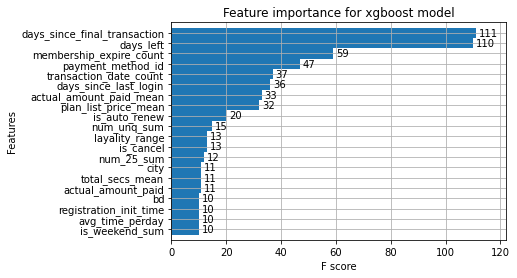

In [ ]:
# plotting important features
xgb.plot_importance(xgb_model, max_num_features=20, height=1)
plt.title('Feature importance for xgboost model')

In [ ]:
# predicting probabilities for test data
pred_test = xgb_model.predict(test)
# predicted prbabilities for test data
pred_test

array([0.01339018, 0.02584306, 0.01339018, ..., 0.01339018, 0.01772232,
       0.01339018], dtype=float32)

**By using this xgboost train model I got 0.12702 on test log-loss.**

## LigntGBM

In [ ]:
# setting parameters
param = {'objective' : 'binary', 
         'metric' : 'binary-logloss',
         'num_leaves' : 31,
         'boosting' : 'dart'}

# creating Dataset for train and cross validation data
train = lgb.Dataset(X_train, label=y_train, feature_name=cols)
cv = lgb.Dataset(X_cv, label=y_cv, feature_name=cols)

In [ ]:
# predicting probabilities for train data
y_pred = lgb_model.predict(X_train)
# calculating log-loss for train data
print(log_loss(y_train, y_pred ))

0.08405046474697057


In [ ]:
# predicting probabilities for cv data
y_pred_cv = lgb_model.predict(X_cv)
# calculating log-loss for cv data
print(log_loss(y_cv, y_pred_cv))

0.08433756840455721


In [ ]:
# predicting probabilities for test data
y_pred_test = lgb_model.predict(test_data)
# probabilities for test data
y_pred_test

array([0.01719102, 0.01942716, 0.01719102, ..., 0.01719102, 0.01942716,
       0.01719102])

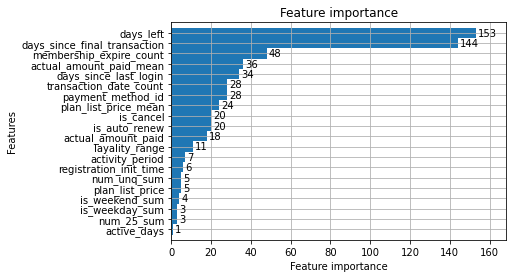

In [ ]:
# plotting important features
lgb.plot_importance(lgb_model,max_num_features=20,height=1)

In [ ]:
# loading sample submission file
submit = pd.read_csv('../Data/sample_submission_v2.csv')
# dropping 'is_churn' feature
submit = submit.drop('is_churn', axis=1, inplace=False)
# getting head(top 5 rows)
submit.head()

msno
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=
2  rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=
3  WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=
4  aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=

In [ ]:
# multiplying probabilities with 0.6
predict['is_churn'] = y_pred_test * 0.60
# getting head(top 5 rows)
predict.head()

msno  is_churn
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=  0.010315
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=  0.011656
2  rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=  0.010315
3  WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=  0.010315
4  aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=  0.011612

**By using this lightGBM model I got 0.12697 on as test log-loss.**

## CatBoost

In [ ]:
# creating Pool for train, test and cv
train = cb.Pool(X_train, label=y_train, feature_names=cols, thread_count=-1)
cv = cb.Pool(X_cv, label=y_cv, feature_names=cols, thread_count=-1)
test = cb.Pool(test_data, feature_names=cols, thread_count=-1)

In [ ]:
# setting parameters
params = {'loss_function' : 'Logloss',
          'eval_metric' : 'Logloss'}

# train the catboost model
cbc_model = cb.train(train, params, num_boost_round=3, verbose=True, eval_set=cv)

Learning rate set to 0.5
0:	learn: 0.1957306	test: 0.1960365	best: 0.1960365 (0)	total: 141ms	remaining: 283ms
1:	learn: 0.1175089	test: 0.1181246	best: 0.1181246 (1)	total: 220ms	remaining: 110ms
2:	learn: 0.1019970	test: 0.1025521	best: 0.1025521 (2)	total: 292ms	remaining: 0us

bestTest = 0.1025521466
bestIteration = 2



In [ ]:
filename = 'finalized_model_cbc_train.sav'
joblib.dump(cbc_model, filename)

['finalized_model_cbc_train.sav']

### Using best model

In [ ]:
# loading the best random forst classifier model from disk
filename = 'finalized_model_cbc_train.sav'
loaded_model = joblib.load(filename)

In [ ]:
# predicting probabilities for train data
pred_train = loaded_model.predict(train, prediction_type='Probability')
# getting probabilities belong to class 1 only
pred_train = pred_train[:,1]
# calculating log-loss
log_loss(y_train, pred_train)

0.10199699583768657

In [ ]:
# predicting probabilities for cv data
pred_cv = loaded_model.predict(cv, prediction_type='Probability')
# getting probabilities belong to class 1 only
pred_cv = pred_cv[:,1]
# calculating log-loss
log_loss(y_cv, pred_cv)

0.10255214658116538

In [ ]:
# predicting probabilities for test data
pred_test = loaded_model.predict(test_data, prediction_type='Probability')
# getting probabilities belong to class 1 only
pred_test = pred_test[:,1]
# probabilities for test data
pred_test

array([0.01213378, 0.03909202, 0.01413892, ..., 0.01215849, 0.03165161,
       0.01413892])

In [ ]:
# dropping 'is_churn' feature from the dataset
predict = predict.drop('is_churn', axis=1, inplace=False)
# getting head(top 5) rows
predict.head()

msno
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=
2  rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=
3  WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=
4  aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=

In [ ]:
# multiplying probabilities with 0.6
predict['is_churn'] = pred_test * 0.6
# getting head(top 5 rows)
predict.head()

msno  is_churn
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=  0.007280
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=  0.023455
2  rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=  0.008483
3  WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=  0.007280
4  aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=  0.013275

**By using this model I got 0.13111 on  test log-loss.**

In [1]:
# loading library
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

from sklearn.metrics import log_loss

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Flatten, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

ModuleNotFoundError: No module named 'prettytable'

## Neural Network Model

In [ ]:
init = tf.keras.initializers.HeUniform()
regular = tf.keras.regularizers.l2(l2=0.01)

# Input layer
input_layer = Input(shape=(57,))

# Dense hidden layer 1
layer1 = Dense(64, activation='relu', kernel_initializer=init, kernel_regularizer=regular)(input_layer)

# Batch Normalization layer 1
b_norm1 = BatchNormalization()(layer1)

# Dropout layer 1
drop1 = Dropout(rate=0.5)(b_norm1)

# Dense hidden layer 2
layer2 = Dense(32, activation='relu', kernel_initializer=init, kernel_regularizer=regular)(drop1)

# Batch Normalization layer 2
b_norm2 = BatchNormalization()(layer2)

# Dropout layer 2
drop2 = Dropout(rate=0.5)(b_norm2)

# Dense hidden layer 3
layer3 = Dense(16, activation='relu', kernel_initializer=init, kernel_regularizer=regular)(drop2)

# Batch Normalization layer 3
b_norm3 = BatchNormalization()(layer3)

# Dropout layer 3
drop3 = Dropout(rate=0.5)(b_norm3)

# Output layer
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.glorot_uniform(), kernel_regularizer=regular)(drop3)

# Creating a model
model = Model(inputs=input_layer, outputs=output_layer)

# summary
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 57)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                3712      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)               

In [ ]:
# Compile model
adam = tf.keras.optimizers.Adam()

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

es = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1, restore_best_weights=True)

cb = [es, checkpoint]

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_cv, y_cv), verbose=1, callbacks=cb)

Epoch 1/10
3026/3035 [============================>.] - ETA: 0s - loss: 0.3991 - accuracy: 0.9202
Epoch 00001: val_loss improved from inf to 0.33759, saving model to drive/My Drive/KKBox/best_model.h5
3035/3035 [==============================] - 15s 5ms/step - loss: 0.3985 - accuracy: 0.9203 - val_loss: 0.3376 - val_accuracy: 0.9324
Epoch 2/10
3032/3035 [============================>.] - ETA: 0s - loss: 0.1625 - accuracy: 0.9532
Epoch 00002: val_loss improved from 0.33759 to 0.22080, saving model to drive/My Drive/KKBox/best_model.h5
3035/3035 [==============================] - 15s 5ms/step - loss: 0.1625 - accuracy: 0.9532 - val_loss: 0.2208 - val_accuracy: 0.9493
Epoch 3/10
3035/3035 [==============================] - ETA: 0s - loss: 0.1549 - accuracy: 0.9530
Epoch 00003: val_loss did not improve from 0.22080
3035/3035 [==============================] - 15s 5ms/step - loss: 0.1549 - accuracy: 0.9530 - val_loss: 0.7959 - val_accuracy: 0.3293
Epoch 4/10
3034/3035 [=====================

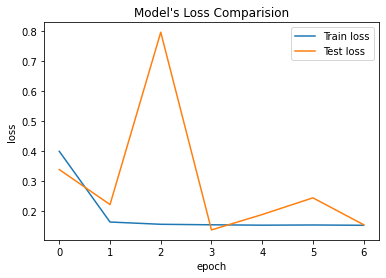

In [ ]:
# loss comparison plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Loss Comparision")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.show()

In [ ]:
# predicting probabilities for test data
pred_test = model.predict(test_data)
# converting 2d array to 1d using flatten
pred_test = pred_test.flatten()
# getting probabilities
pred_test

array([0.02549033, 0.01600544, 0.01716729, ..., 0.02102195, 0.0169536 ,
       0.01507807], dtype=float32)

In [ ]:
# dropping default class labels
predict = predict.drop('is_churn', axis=1, inplace=False)
# getting head(top 5 rows)
predict.head()

msno
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=
2  rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=
3  WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=
4  aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=

In [ ]:
# multiplying 0.6 with class labels, and assigning them to new feature 'is_churn'
predict['is_churn'] = pred_test * 0.6
# getting head(top 5 rows)
predict.head()

msno  is_churn
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=  0.015294
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=  0.009603
2  rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=  0.010300
3  WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=  0.013388
4  aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=  0.020817

**By using this model I got 0.12291 on test log-loss.**

## Second Neural Network Model

In [ ]:
init = tf.keras.initializers.HeNormal()
regular = tf.keras.regularizers.l2(l2=0.1)

# Input layer
input_layer = Input(shape=(57,))

# Dense hidden layer 1
layer1 = Dense(64, activation='relu', kernel_initializer=init, kernel_regularizer=regular)(input_layer)

# Batch Normalization layer 1
b_norm1 = BatchNormalization()(layer1)

# Dropout layer 1
drop1 = Dropout(rate=0.5)(b_norm1)

# Dense hidden layer 2
layer2 = Dense(32, activation='relu', kernel_initializer=init, kernel_regularizer=regular)(drop1)

# Batch Normalization layer 2
b_norm2 = BatchNormalization()(layer2)

# Dropout layer 2
drop2 = Dropout(rate=0.5)(b_norm2)

# Dense hidden layer 3
layer3 = Dense(16, activation='relu', kernel_initializer=init, kernel_regularizer=regular)(drop2)

# Batch Normalization layer 3
b_norm3 = BatchNormalization()(layer3)

# Dropout layer 3
drop3 = Dropout(rate=0.5)(b_norm3)

# Output layer
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.glorot_normal(), kernel_regularizer=regular)(drop3)

# Creating a model
model = Model(inputs=input_layer, outputs=output_layer)

# summary
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 57)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                3712      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)               

In [ ]:
# Compile model
adam = tf.keras.optimizers.Adam()

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
filepath = "drive/My Drive/KKBox/best_model_2.h5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

es = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1, restore_best_weights=True)

cb = [es, checkpoint]

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_cv, y_cv), verbose=1, callbacks=cb)

Epoch 1/10
3029/3035 [============================>.] - ETA: 0s - loss: 0.7344 - accuracy: 0.9347
Epoch 00001: val_loss improved from inf to 0.27801, saving model to drive/My Drive/KKBox/best_model_2.h5
3035/3035 [==============================] - 16s 5ms/step - loss: 0.7334 - accuracy: 0.9347 - val_loss: 0.2780 - val_accuracy: 0.9020
Epoch 2/10
3027/3035 [============================>.] - ETA: 0s - loss: 0.1925 - accuracy: 0.9460
Epoch 00002: val_loss improved from 0.27801 to 0.21138, saving model to drive/My Drive/KKBox/best_model_2.h5
3035/3035 [==============================] - 16s 5ms/step - loss: 0.1925 - accuracy: 0.9460 - val_loss: 0.2114 - val_accuracy: 0.9348
Epoch 3/10
3030/3035 [============================>.] - ETA: 0s - loss: 0.1872 - accuracy: 0.9458
Epoch 00003: val_loss improved from 0.21138 to 0.16718, saving model to drive/My Drive/KKBox/best_model_2.h5
3035/3035 [==============================] - 16s 5ms/step - loss: 0.1873 - accuracy: 0.9458 - val_loss: 0.1672 - va

In [ ]:

# getting predictions for test data
predictions = model.predict(test_data)
# converting 2d array to 1d using flatten
predictions = predictions.flatten()
# getting probabilities
predictions

array([0.02882533, 0.01901679, 0.02031952, ..., 0.02142653, 0.01834583,
       0.01852141], dtype=float32)

In [ ]:
# loading sample submission file
predict = pd.read_csv('drive/My Drive/KKBox/sample_submission_v2.csv')
# dropping default class labels
predict = submit.drop('is_churn', axis=1, inplace=False)
# getting head(top 5 rows)
predict.head()

msno
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=
2  rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=
3  WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=
4  aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=

In [ ]:
# multiplying 0.6 with class labels, and assigning them to new feature 'is_churn'
submit['is_churn'] = predictions * 0.6
# getting head(top 5 rows)
submit.head()

msno  is_churn
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=  0.017295
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=  0.011410
2  rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=  0.012192
3  WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=  0.015435
4  aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=  0.019524

**By using this model I got 0.11980 on test log-loss**

In [1]:
from prettytable import PrettyTable

In [18]:
table = PrettyTable()

table.field_names = ['Model name', 'Logloss']

table.add_row(['Random Forest Classifier', 0.15946])
table.add_row(['Decision Tree Classifier', 0.4287])
table.add_row(['Logistic Regression', 0.5197])
table.add_row(['CatBoost', 0.13111])
table.add_row(['XGBoost', 0.12702])
table.add_row(['LightGBM', 0.12697])
table.add_row(['Neural Network Model - 1', 0.12291])
table.add_row(['Neural Network Model - 2', 0.11980])

print(table)

+--------------------------+---------+
|        Model name        | Logloss |
+--------------------------+---------+
| Random Forest Classifier | 0.15946 |
| Decision Tree Classifier |  0.4287 |
|   Logistic Regression    |  0.5197 |
|         CatBoost         | 0.13111 |
|         XGBoost          | 0.12702 |
|         LightGBM         | 0.12697 |
| Neural Network Model - 1 | 0.12291 |
| Neural Network Model - 2 |  0.1198 |
+--------------------------+---------+
